### Resumen del proyecto
Profundizaremos y ajustaremos la resolución del proyecto correspondiente a predecir el flujo vehicular para el a{o 2021 en la autopista Illia. Agregaremos una fuente de datos, probaremos un modelo nuevo y intentaremos responder una pregunta nueva. Elaboraremos un informe final que describirá el proceso de toma de decisiones. Sustentaremos la razón por la cual usamos las librerías y aplica,ps los métodos al dataset. Todos los hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.



---

## Introducción

El proyecto que se llevará a cabo será la continuación del proyecto N°3 . El obejtivo de éste proyeto será llevar a cabo la predicción del flujo vehicular para el año 2020, con la implementación de un modelo nuevo llamado VARMAX (Vectores Autorregresivos de Media Movil con Regresores Exógenos). Este modelo multivariado nos permitirá predecir una serie de tiempo por medio de múltiples series de tiempo. Como mencionamos en el proyecto 3, se plantea la suposición de que existen variables que no tenemos en cuenta que impactan en el tránsito vehicular de la Autopista Illia con pago en efectivo (dataset provisto por https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Nos centraremos en investigar si una disminución o un aumento en el empleo registrado del sector privado (dataset provisto por  https://charts.alphacast.io/grapher/argentina---main-labor-indicators?tab=chart&stackMode=absolute&year=latest&time=2013-05-01..2020-09-01) y junto con la producción total de autos y sus ventas (dataset provisto https://charts.alphacast.io/datasets/5600),  afectan el flujo vehicular del peaje. trabajaremos con los dataset del año 2017 al 2020, la idea será comparar los datos predichos con los datos originales mediante la evaluación de los errores para ver que tan eficiente son.

#### El ciclo de trabajo será:
* Análisis exploratorio de los datos.
* Modelización y prueas.
* Conclusión final.

El proyecto anterior lo finalizamos haciendo mención que probablemente algunas variables que no estamos teniendo en cuenta influyan de alguna manera en el flujo vehicular del Peaje de la Autopista Illia en cuanto a su volumen y frecuencia. En dicho proyecto pudimos predecir de una manera correcta como se comportó semanalmente  el dataset para el año 2017, 2018 y 2019. Para el año 2020 la predicción no fue la correcta debido a la cuarentena que se llevó cabo por el Covid-19. Luego de haber llevado a cabo la investigación surgieron algunas preguntas, que mas allá de presenttar una naturaleza económica, pensamos que pueden influir en el flujo vehicular. Alguna de ellas son ¿Acaso la actividad laboral puede influir en el flujo vehicular?¿La cantidad de vehiculos que transitan es un reflejo del comportamiento de otras variables que no estamos teniendo en cuenta?¿El comportamiento que tenga la actividad laboral en el sector privado puede influir en la producción de vehiculos?¿Acaso la producción de vehiculos puede afectar el flujo de vehiculos que transitan?. Estas preguntas pueden ser usadas de guia para comenzar el trabajo, intentaremos responderlas y estaremos abiertos a plantear nuevas preguntas que nos ayuden a llegar a nuevas conclusiones. La idea es probar un modelo nuevo que no hemos tenido la posibilidad de usarlo, llamado VARMAX(Modelo de media movil autorregresiva vectorial con regresores exógenos), el cual nos permite hacer una predicción con múltiples series de tiempo. Su esencia es ver la cointegración entre las distintas series de tiempo, viendo si se influyen entre si y pronosticar posibles resultados.

---

### Preparación del Dataset

In [1]:
# Importamos las librerías con las que trabajaremos.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

Comenzaremos importando los dataset con los que vamos a trabajar. En esta primera parte vamos a dejar los dataset correspondientes a los año 2017,2018 y 2019 iguales a el proyecto anterior. Para el dataset correspondiente al 2020 vamos a investigar si la estructura es igual o cambia. Cada Dataset tendrá sus arreglos correspondientes para crear un dataset en conjunto que contenga todas las series de tiempo. A lo largo del proyecto iremos definiendo el origen de los mismos y que vamos haciendo con ellos.

In [2]:
# Cargamos los Dataset con los que trabajaremos.
data_2017 = pd.read_csv("C:flujo-vehicular-2017.csv", sep =',')
data_2018 = pd.read_csv("C:flujo-vehicular-2018.csv", sep =',')
data_2019 = pd.read_csv("C:flujo-vehicular-2019.csv", sep =',')
data_2020 = pd.read_csv("C:flujo-vehicular-2020.csv", sep =',')
data_trabajo = pd.read_csv("C:5577.csv", sep=',')
data_produccion = pd.read_csv("C:5600.csv", sep=',')

#### Año 2017

In [3]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


#### Año 2018

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


#### Año 2019

In [5]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [6]:
#Comenzaremos trabajando el dataset del 2017,2018 y 2019 igual al proyecto anterior.
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO') #np.logical_and:valor de verdad de x1 Y x2 por elementos.
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019,2019-01-01,2,Martes,Centro,Liviano,537
86,2019,2019-01-01,2,Martes,Centro,Pesado,1
88,2019,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019,2019-01-01,3,Martes,Centro,Liviano,769


In [7]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin',"periodo"], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [8]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [9]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [10]:
#Resampleamos nuestros datos para agrupar por dia.
diario = dataset.resample('D', on = 'fecha').sum().astype("float64")
diario

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


#### Año 2020

In [11]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [12]:
data_2020.describe()

,periodo,dia_fecha,hora_inicio,hora_fin,cantidad_pasos
count,2533743.0,2.533743e+06,2.533743e+06,2.533743e+06,2.533743e+06
mean,2020.0,1.574754e+01,1.209809e+01,1.234105e+01,3.442124e+01
std,0.0,8.785705e+00,6.280640e+00,6.366784e+00,1.385131e+02
min,2020.0,1.000000e+00,0.000000e+00,0.000000e+00,9.915789e-01
25%,2020.0,8.000000e+00,7.000000e+00,8.000000e+00,1.000000e+00
50%,2020.0,1.600000e+01,1.200000e+01,1.300000e+01,4.000000e+00
75%,2020.0,2.300000e+01,1.700000e+01,1.800000e+01,1.400000e+01
max,2020.0,3.100000e+01,2.300000e+01,2.300000e+01,3.909796e+03


In [13]:
#¿Cúales fueron las 2 formas de pago mas utilizadas?
data_2020.forma_pago.value_counts()

Tag                  1429726
Violación             424291
Efectivo              264083
Rec.Deuda             187388
Exento                149718
Tarjeta Magnética      50495
CPP                    17379
Mercado Pago           10663
Name: forma_pago, dtype: int64

In [14]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [15]:
print(data_2019['sentido'].unique())

['Centro' 'Provincia']


In [16]:
print(data_2019['tipo_vehiculo'].unique())

['Liviano' 'Pesado']


Notamos que el dataset correspondiente al año 2020 es miy similar a o los otros años, sin embargo notamos que algunas columnas tienen diferente formatos, como por ejemplo en los Dataset anetriores la forma de pago dice "EFECTIVO" y para el 2020 dice "Efectivo", también la forma de pago "TELEPASE", es llamado "TAG". Son algunos de los detalles que vamos a tener en cuenta para llevar a cabo nuestro trabajo.

#### Datos trabajo.

In [13]:
data_trabajo.info()
data_trabajo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        235 non-null    object 
 1   Year                                          235 non-null    object 
 2   Índice base ago. 01=100                       235 non-null    float64
 3   Tasa de entrada                               234 non-null    float64
 4   Tasa de salida                                234 non-null    float64
 5   Tasa de Rotación                              234 non-null    float64
 6   Índice base ago. 01=100 - sa                  235 non-null    float64
 7   Índice base ago. 01=100 - sa_MoM              234 non-null    float64
 8   Índice base ago. 01=100 - current_prices_yoy  223 non-null    float64
dtypes: float64(7), object(2)
memory usage: 16.6+ KB


,Entity,Year,Índice base ago. 01=100,Tasa de entrada,Tasa de salida,Tasa de Rotación,Índice base ago. 01=100 - sa,Índice base ago. 01=100 - sa_MoM,Índice base ago. 01=100 - current_prices_yoy
0,Argentina,2001-08-01,100.0000,NaN,NaN,NaN,100.2095,NaN,NaN
1,Argentina,2001-09-01,99.0589,1.5046,2.4457,1.9751,99.2265,-0.9809,NaN
2,Argentina,2001-10-01,98.3838,1.6655,2.3470,2.0063,98.3579,-0.8753,NaN
3,Argentina,2001-11-01,97.9157,1.9255,2.4014,2.1634,97.6103,-0.7601,NaN
4,Argentina,2001-12-01,96.7296,1.5566,2.7679,2.1622,96.2586,-1.3848,NaN


#### Datos de producción vehicular.

In [14]:
data_produccion.info()
data_produccion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 62 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Entity                                                                208 non-null    object 
 1   Year                                                                  208 non-null    object 
 2   Production - Total                                                    208 non-null    int64  
 3   Exports - Total                                                       208 non-null    int64  
 4   Sales - Total                                                         208 non-null    int64  
 5   Production - Cars                                                     208 non-null    int64  
 6   Exports - Cars                                                        208 non-null    int64  
 7  

,Entity,Year,Production - Total,Exports - Total,Sales - Total,Production - Cars,Exports - Cars,Sales - Cars,Production - Other Vehicles,Exports - Other Vehicles,...,Exports - Cars - current_prices_3m_yoy,Exports - Total - current_prices_3m_yoy,Production - Cars - current_prices_3m_yoy,Production - Total - current_prices_3m_yoy,Sales - Other Vehicles - current_prices_3m_yoy,Exports - Other Vehicles - current_prices_3m_yoy,Production - Other Vehicles - current_prices_3m_yoy,Sales to domestic market - Total - current_prices_3m_yoy,Sales to domestic market - Imported vehicles - current_prices_3m_yoy,Sales to domestic market - National vehicles - current_prices_3m_yoy
0,Argentina,2004-01-01,11725,4875,20870,7495,3275,16205,4230,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2004-02-01,12963,9806,19101,9197,6124,14024,3766,3682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2004-03-01,20742,9998,23527,14655,6896,17259,6087,3102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2004-04-01,19266,10461,23454,13368,7461,17805,5898,3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2004-05-01,20075,10324,26494,13483,7473,20053,6592,2851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

#### Arreglo del Dataframe del flujo vehicular correspondiente al año 2020

In [15]:
# Primero seleccionamos la estación con la que vamos a trabajar y la forma de pago Efectivo.
mask =np.logical_and(data_2020.estacion == "ILLIA", data_2020.forma_pago == "Efectivo")
data_2020 = data_2020[mask]

# Pasamos la columna fecha a formato Datatime y le unimos la hora_fin como hora.
data_2020["fecha2"] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = "h")

# Quitamos lsa columnas fechas y hora_fin ya que fueron incluidas en el campo fecha2.
data_2020.drop(columns = ["fecha","hora_inicio","hora_fin","dia_fecha","periodo"], inplace = True)

# Corregimos el nombre de fecha2 y se llamará fecha.
data_2020.rename(columns = {"fecha2":"fecha"},inplace=True)

# Reordenamos el dataset por fecha.
data_2020.sort_values("fecha", inplace = True)
data_2020.reset_index(drop = True, inplace = True)

# Resampleamos nuestros datos para agrupar por dia y asi obetener una visualización mas amigable.
diario_2020 = data_2020.resample("D", on = "fecha").sum().astype("float64")


In [16]:
diario_2020

,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


In [22]:
# Concatenamos la serie junto con las demás.
peaje_diario = pd.concat([diario,diario_2020])
peaje_diario

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


#### Arreglo del Dataframe laboral.

In [23]:
data_trabajo

,Year,Tasa de entrada,Tasa de salida,Tasa de Rotación
0,2001-08-01,NaN,NaN,NaN
1,2001-09-01,1.5046,2.4457,1.9751
2,2001-10-01,1.6655,2.3470,2.0063
3,2001-11-01,1.9255,2.4014,2.1634
4,2001-12-01,1.5566,2.7679,2.1622
...,...,...,...,...
230,2020-10-01,1.0468,1.0988,1.0728
231,2020-11-01,1.2531,1.1296,1.1914
232,2020-12-01,1.2744,1.4513,1.3628
233,2021-01-01,1.6018,1.3481,1.4749


De toda la información que nos muestra el Dataframe, vamos a trabajar con las columnas tasa de entrada y tasa de salida, que nos van a estar mostrando las porciones de altas y bajas de empleados, respectivamente, sobre la dotación inicial del mes de referencia. También con la columna de tasa de rotación que nos brindará la información de la diferencia entre la tasa de entrada y la de salida.

In [24]:
# Quitamos lsa columnas con las que no vamos a trabajar.
data_trabajo.drop(columns = ["Entity","Índice base ago. 01=100","Índice base ago. 01=100 - sa","Índice base ago. 01=100 - sa_MoM","Índice base ago. 01=100 - current_prices_yoy"], inplace = True)
data_trabajo

KeyError: "['Entity' 'Índice base ago. 01=100' 'Índice base ago. 01=100 - sa'\n 'Índice base ago. 01=100 - sa_MoM'\n 'Índice base ago. 01=100 - current_prices_yoy'] not found in axis"

In [25]:
# Eliminamos los valores NaN.
data_trabajo.dropna()

,Year,Tasa de entrada,Tasa de salida,Tasa de Rotación
1,2001-09-01,1.5046,2.4457,1.9751
2,2001-10-01,1.6655,2.3470,2.0063
3,2001-11-01,1.9255,2.4014,2.1634
4,2001-12-01,1.5566,2.7679,2.1622
5,2002-01-01,1.3526,3.0611,2.2068
...,...,...,...,...
230,2020-10-01,1.0468,1.0988,1.0728
231,2020-11-01,1.2531,1.1296,1.1914
232,2020-12-01,1.2744,1.4513,1.3628
233,2021-01-01,1.6018,1.3481,1.4749


Como anteriromente dijimos la columna "Tasa de Rotación" nos muestra un promedio entre los valores de entrada y salida. El dato que se muestra es mensual. Pensandolo mejor es la información que necesitamos para llevar a cabo nuestro trabajo, por lo tanto nos quedaremos con esa columna y la correspondiente a "Year".

In [26]:
# Seleccionamos solamente las columnas que nos interesan.
data_trabajo = data_trabajo[["Year","Tasa de Rotación"]]

# Renombramos las columnas.
job = data_trabajo.rename (columns= {"Year":"Date","Tasa de Rotación":"Rotation_mean"})

# Le damos el formato fecha a Date y lo convertimos en indice.
job["fecha"] = pd.to_datetime(job.Date)
job.set_index("fecha", inplace = True)

# Quitamos la anterior columna de fecha y solo nos quedamos con los datos del 2017 en adelante y eliminamos los datos correspondientes al año 2021
job = job.drop(columns = ["Date"],axis = 1)
job = job[job.index>"2016-12-31"]
job = job[job.index<"2021-01-01"]
job.reset_index(drop=True, inplace=True)
job.shape

(48, 1)

In [27]:
job

,Rotation_mean
0,2.4353
1,2.0940
2,2.8359
3,2.3812
4,2.2133
5,2.0370
6,1.9926
7,2.4251
8,2.0557
9,2.1195


#### Arreglo del Dataframe de producción automotriz.

In [28]:
data_produccion

,Year,Production - Total,Sales - Total
0,2004-01-01,11725,20870
1,2004-02-01,12963,19101
2,2004-03-01,20742,23527
3,2004-04-01,19266,23454
4,2004-05-01,20075,26494
...,...,...,...
203,2020-12-01,30172,38994
204,2021-01-01,24308,27303
205,2021-02-01,21809,26676
206,2021-03-01,43160,32359


En este caso tenemos un Dataframe con 62 columnas. Para realizar nuestro trabajo pensamos que debemos seleccionar las adecuadas. Vamos a estar trabajando con la columna Year que nos informa la fecha, la columna production total que está compuesta por autos y otros automoviles producidos y por último con la columna Sales total que nos muestra las ventas totales que corresponden a la venta de autos y otros automoviles.

In [29]:
# Seleccionamos las columnas.
data_produccion = data_produccion [["Year","Production - Total","Sales - Total"]]

# Renombramos las columnas
produccion_vehicular = data_produccion.rename(columns = {"Year" : "Año","Production - Total":"produccion_total","Sales - Total":"ventas_total"})

# Al igual que el dataset laboral, éste dataset contiene datos del 2017 para atás y del 2021. Nos quedaremos con aquellos datos del 2017 hasta el 2020.
produccion_vehicular = produccion_vehicular[produccion_vehicular.Año >"2016-12-31"]
produccion_vehicular = produccion_vehicular[produccion_vehicular.Año <"2021-01-01"]

# Realizamos un reset del indice y seleccionamos las columnas con las que trabajaremos.
produccion_vehicular.reset_index(drop=True,inplace=True)
produccion_vehicular=produccion_vehicular[["produccion_total","ventas_total"]]
produccion_vehicular.shape

(48, 2)

In [30]:
produccion_vehicular

,produccion_total,ventas_total
0,26762,52841
1,25717,65274
2,39675,68947
3,37731,68117
4,45273,79521
5,45496,80172
6,38169,72684
7,45262,76700
8,46961,76192
9,43854,74416


---

#### Resampleo de la serie.

El dataset de producción automotriz y el laboral tienen datos mensuales, mientras que el dataset del flujo vehicular datos diarios y incluso tienen la hora exacta de su registro. La estrategia será resamplear la serie de los peajes de manera mensual.

In [31]:
resample_month = peaje_diario.resample("M").mean()
resample_month = resample_month.reset_index()
resample_month.shape

(48, 2)

#### Concatenación de las series.

Realizaremos la concatenación de las 3 series. Estos datos son mas bien informativos, por eso no nos importa que no se especifique la horra y la fecha. No es importante seguir un fecha de acontecimientos, motivo por el cual son mensuales.

In [32]:
dataset = pd.concat([resample_month,produccion_vehicular, job], axis=1)
dataset.sort_values("fecha",ascending=True)
dataset.set_index("fecha",inplace=True)
dataset

,cantidad_pasos,produccion_total,ventas_total,Rotation_mean
fecha,,,,
2017-01-31,50492.258065,26762,52841,2.4353
2017-02-28,48682.607143,25717,65274,2.0940
2017-03-31,46813.354839,39675,68947,2.8359
2017-04-30,45799.500000,37731,68117,2.3812
2017-05-31,45391.483871,45273,79521,2.2133
2017-06-30,46948.800000,45496,80172,2.0370
2017-07-31,48478.064516,38169,72684,1.9926
2017-08-31,48136.516129,45262,76700,2.4251
2017-09-30,50644.233333,46961,76192,2.0557


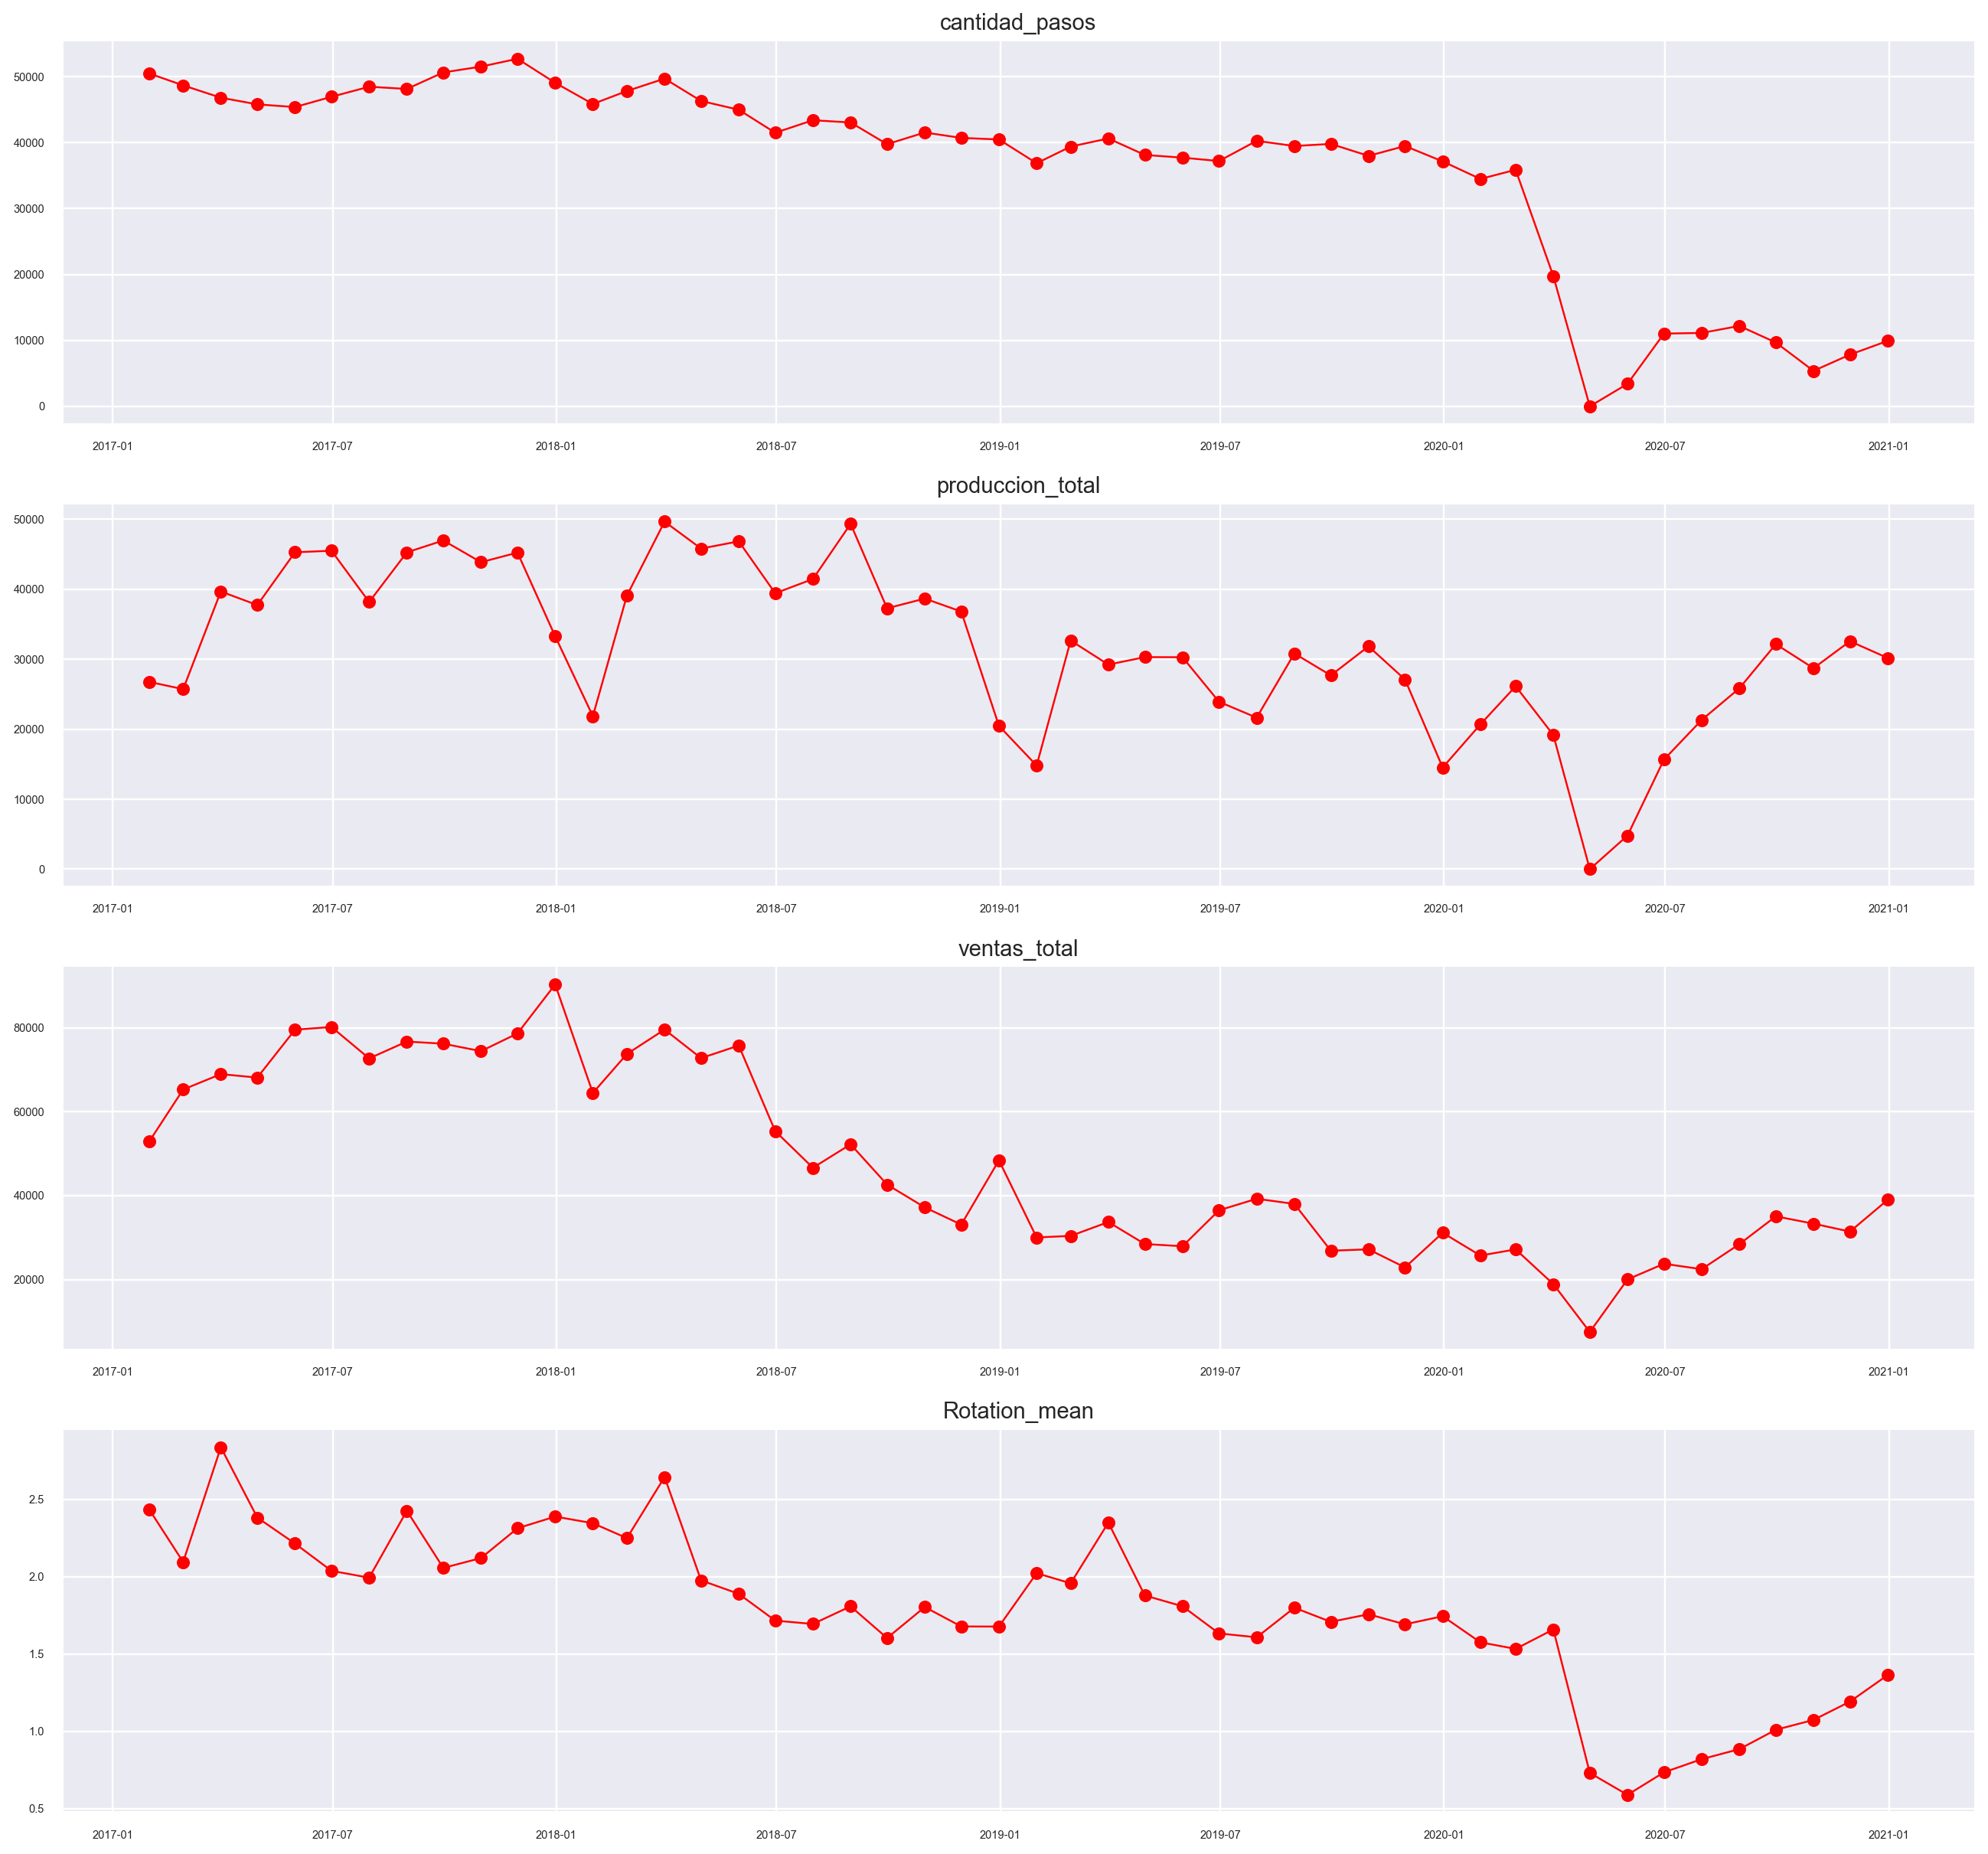

In [33]:
# Graficaremos todas las variables que contienen el Dataset.
fig, axes = plt.subplots(nrows = 4, dpi=175, figsize=(15,14))
for i, ax in enumerate(axes.flatten()): #flatten copia de la matriz colapsada en una dimensión.
    data = dataset[dataset.columns[i]]
    ax.plot(data, color ="red", linewidth = 1,marker ="o")
    
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout();    


#### Análisis exploratorio de Datos.
Utilizaremos la función Describe para evaluar las principales variables estadísticas.

In [34]:
dataset.describe()

,cantidad_pasos,produccion_total,ventas_total,Rotation_mean
count,48.000000,48.000000,48.000000,48.000000
mean,36139.116564,31500.645833,46895.229167,1.780552
std,14927.798210,11452.641378,22034.329441,0.516332
min,0.000000,0.000000,7512.000000,0.588400
25%,36623.308120,25266.750000,28460.750000,1.605800
50%,40373.661290,31324.500000,38507.500000,1.800650
75%,46440.038710,39483.750000,69881.250000,2.100375
max,52714.266667,49655.000000,90307.000000,2.835900


Analizando los datos, podemos decir que la cantidad de vehiculos, la producción total de vehiculos y la venta total de ellos, presentan magnitudes similares en cuanto a los datos. Al observar el formato de los indices de rotación, al moemento de realizar un modelado, previamente deberemos hacer un escalado de los datos.También notamos que el mínimo de cantidad de vehículos es 0, como dijimos en el proyecto anterior, se debió a eventos gubernamentales y piquetes, aunque en el gráfico notamos también como baja la circulación notablemente debido a la cuarentena. El valor mínimo de la producción total también es 0 debido a la cuarentena, donde se vió totalmente paralizada la producción automotriz, mas allá que las ventas no se frenaron, pudiendo decir que existe un considerable stock, ya que también como se puede observar el promedio de ventas es mayor al de producción.

---

#### Tendencias de las variables.

In [35]:
# Utilizaremos la libreria de Scikit Learn de modelo de Regresió Lineal para evaluar la tendencia de cada serie.
from sklearn.linear_model import LinearRegression

In [36]:
data_regression = dataset.copy()

In [37]:
data_regression["fecha_numeros"] = data_regression.index.map(datetime.datetime.toordinal)

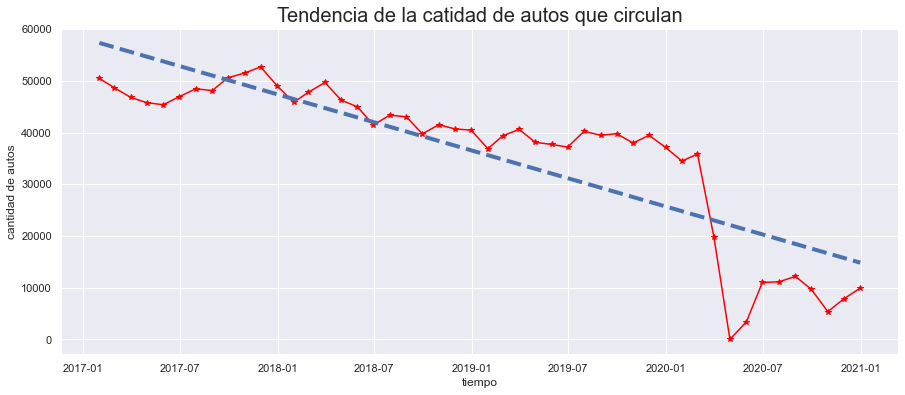

In [38]:
#Tendencia de la cantidad de autos que circulaen en ele Peaje Illia.
liner_reg = LinearRegression()
liner_reg.fit(data_regression.fecha_numeros.values.reshape(-1,1), data_regression.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(data_regression.index, data_regression.cantidad_pasos, marker = "*",color="red")
plt.plot(data_regression.index, liner_reg.predict(data_regression.fecha_numeros.values.reshape(-1,1)), lw= 4, ls = "--")

plt.title("Tendencia de la catidad de autos que circulan", size = 20)
plt.xlabel("tiempo")
plt.ylabel("cantidad de autos")
plt.show()

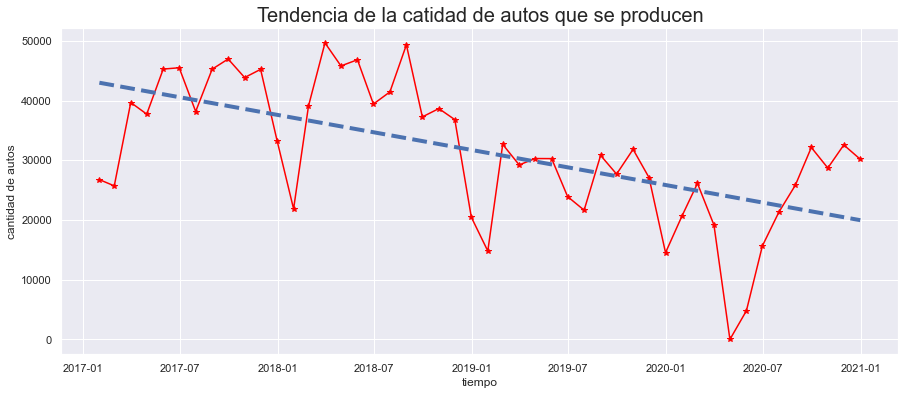

In [39]:
#Tendencia de la cantidad de autos que se producen.
liner_prod = LinearRegression()
liner_prod.fit(data_regression.fecha_numeros.values.reshape(-1,1), data_regression.produccion_total)

plt.figure(figsize = (15,6))
plt.plot(data_regression.index, data_regression.produccion_total, marker = "*",color="red")
plt.plot(data_regression.index, liner_prod.predict(data_regression.fecha_numeros.values.reshape(-1,1)), lw= 4, ls = "--")

plt.title("Tendencia de la catidad de autos que se producen", size = 20)
plt.xlabel("tiempo")
plt.ylabel("cantidad de autos")
plt.show()

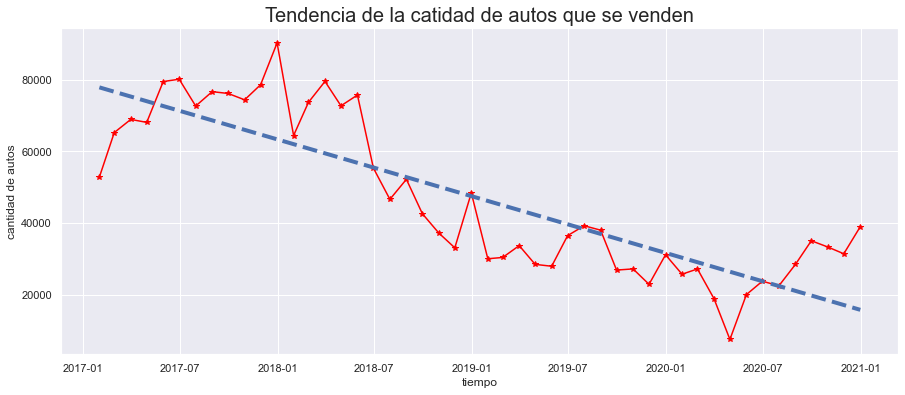

In [40]:
#Tendencia de la cantidad de autos que se venen.
liner_ventas = LinearRegression()
liner_ventas.fit(data_regression.fecha_numeros.values.reshape(-1,1), data_regression.ventas_total)

plt.figure(figsize = (15,6))
plt.plot(data_regression.index, data_regression.ventas_total, marker = "*",color="red")
plt.plot(data_regression.index, liner_ventas.predict(data_regression.fecha_numeros.values.reshape(-1,1)), lw= 4, ls = "--")

plt.title("Tendencia de la catidad de autos que se venden", size = 20)
plt.xlabel("tiempo")
plt.ylabel("cantidad de autos")
plt.show()

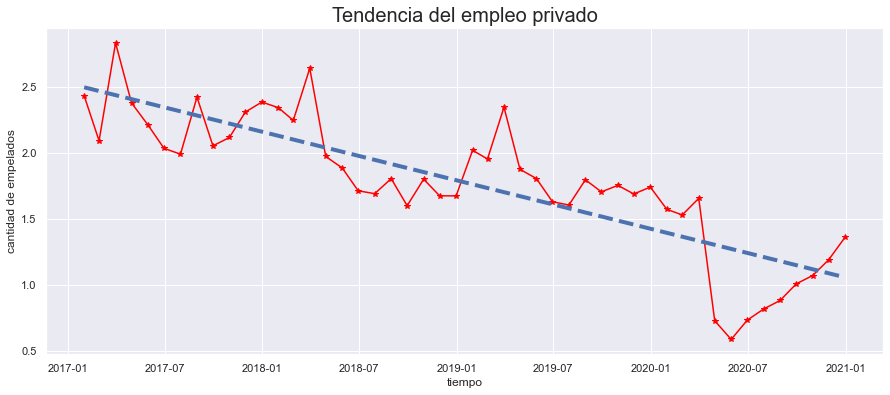

In [41]:
#Tendencia del empleo privado.
liner_em = LinearRegression()
liner_em.fit(data_regression.fecha_numeros.values.reshape(-1,1), data_regression.Rotation_mean)

plt.figure(figsize = (15,6))
plt.plot(data_regression.index, data_regression.Rotation_mean, marker = "*",color="red")
plt.plot(data_regression.index, liner_em.predict(data_regression.fecha_numeros.values.reshape(-1,1)), lw= 4, ls = "--")

plt.title("Tendencia del empleo privado", size = 20)
plt.xlabel("tiempo")
plt.ylabel("cantidad de empelados")
plt.show()

Se puede observa que todas las series presentan una tendencia negativa. También se puede observar claramente en todos los gráficos el efecto de la cuarentena, aunque podemos apreciar un rebote en la producción de vehiculos y en el empleo privado, que a diferencia de las otras series se puede observar un estancamiento luego de mediados de marzo. 

##### ¿Influye la producción de vehiculos y sus respectivas ventas en el flujo de vehiculos?

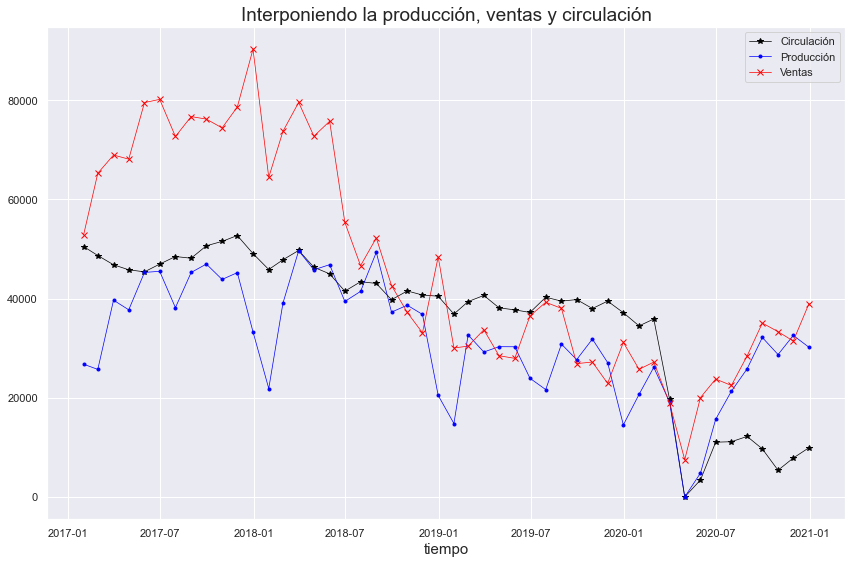

In [42]:
plt.figure(figsize = (12,8))
plt.plot(dataset.cantidad_pasos, marker = "*", linestyle = "-", linewidth = 0.7, label = "Circulación", color = "black")
plt.plot(dataset.produccion_total, marker = ".", linestyle = "-", linewidth = 0.7, label = "Producción", color = "blue")
plt.plot(dataset.ventas_total, marker = "x", linestyle = "-", linewidth = 0.7, label = "Ventas", color = "red")
plt.xlabel("tiempo", size =15)
plt.title("Interponiendo la producción, ventas y circulación", size = 19)
plt.legend()
plt.tight_layout()
plt.show()

Es interesante observar el gráfico analizándolo desde el punto de vista de la producción, ya que la misma presenta caracteristicas similares a la cantidad de vehiculos que circulan en el peaje. Podemos observar en el gráfico como a comienzos del 2017, las 3 series presentan origenes diferentes y un comportamiento diferente, sin embargo es muy notable el comportamiento distinto que presenta la venta de vehiculos sobre las otras dos variables. Para el mes de febrero del año 2018, las 3 variables tienen una caida y una posterior recuperación, llegando la producción y ventas a susu picos máximos. Investigando los motivos de la caida de febrero del año 2018, podemos decir que independientemente de que la economia creció en el año 2018, para ese mes existió un volatididad alta con respecto a la moneda estadounidense. Pensamos que al ser un sector dependiente de materia prima importada, ése sea el factor de dicho comportamiento (adjuntamos noticia: https://www.lanacion.com.ar/economia/dolar/en-febrero-el-dolar-cerro-en-baja-despues-que-el-bcra-bajo-las-tasas-de-interes-nid2112923/), en cuanto al flujo de vehiculos, pudo deberse a una caida de la actividad económica. A partir del tercer trimestre del año 2018 y para comienzoas del año 2020 podemos observar que todas las series comienzan a tener un comportamiento similar, siendo la mas volatil la producción de vehiculos. Finalmente podemos observar el efecto de la cuarentena, donde hay una caida abrupta de las 3 variables, llegando a 0 la producción y la circulación, no así las ventas (que pudo deberse a efectos contractuales), sin embargo su caida es muy marcada. Por último se observa un rebote recuperandose la producción y las ventas, no así la circulacion que tiene un efecto estancado.

---

A continuación llevaremos a cabo dos gráficos, en el primero compararemos el comportamiento del flujo vehicular diario con el mensual. En el segundo gráfico haremos el mismo proceso pero comparando el flujo semanal con el mensual.

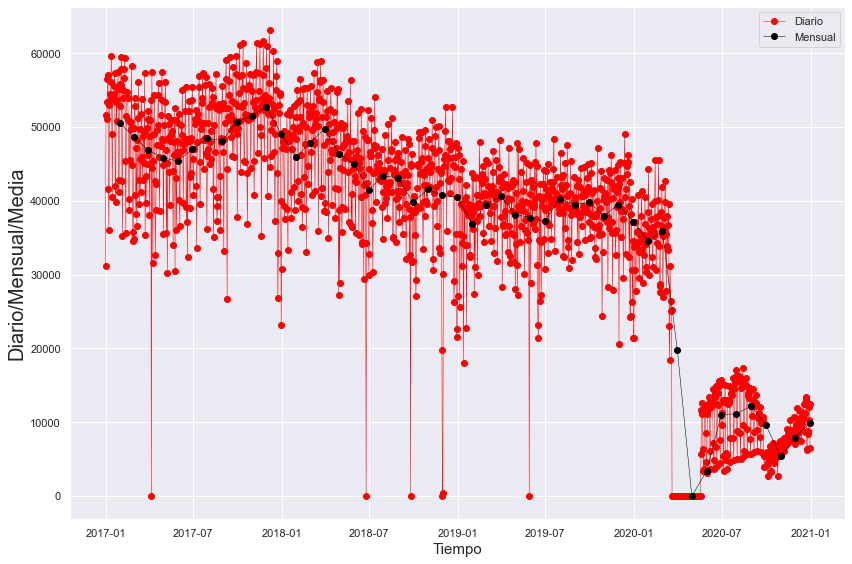

In [43]:
# Flujo diario con mensual.
plt.figure(figsize = (12,8))
plt.plot(peaje_diario, marker = "o", linestyle = "-", linewidth = 0.5, label = "Diario", color = "red")
plt.plot(dataset.cantidad_pasos, marker = "o", linestyle = "-", linewidth = 0.5, label = "Mensual", color = "black")
plt.xlabel("Tiempo", size=15)
plt.ylabel("Diario/Mensual/Media",size=20)
plt.legend()
plt.tight_layout()
plt.show()

En el gráfico podemos observar que los resultados iguales a 0 no influyen en los demás datos, recordemos que esos atípicos eran por piquetes y eventos gubernamentales. Claramente se puede observar el efecto de la cuarentena en mediados del mes de marzo del año 2020. También notamos que practicamente no hay circulación en ese peaje haste el mes de junio.

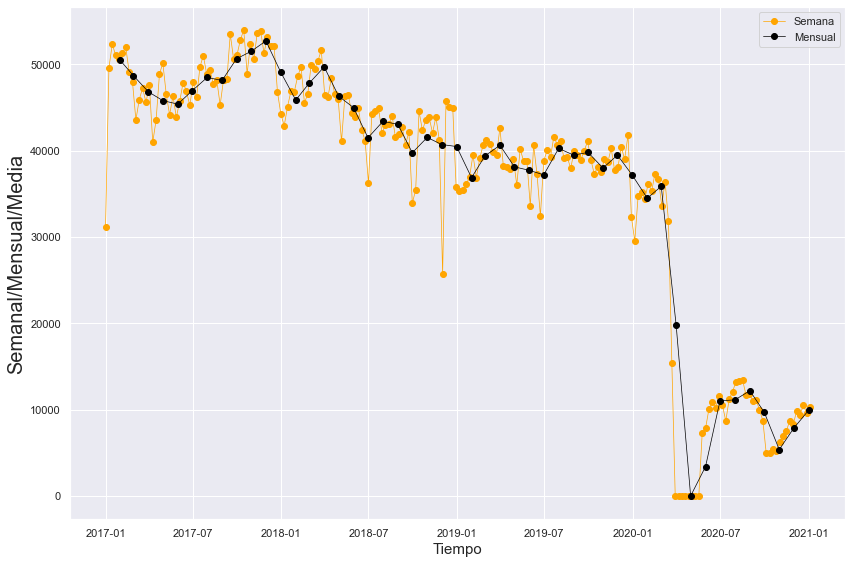

In [44]:
# Flujo semanal y mensual.

# Resampleo de la serie a mensual.
semanal = peaje_diario.resample("W").mean()

plt.figure(figsize = (12,8))
plt.plot(semanal, marker = "o", linestyle = "-", linewidth = 0.7, label = "Semana", color = "orange")
plt.plot(dataset.cantidad_pasos, marker = "o", linestyle = "-", linewidth = 0.7, label = "Mensual", color = "black")
plt.xlabel("Tiempo", size=15)
plt.ylabel("Semanal/Mensual/Media",size=20)
plt.legend()
plt.tight_layout()
plt.show()

Lo que primero observamos es el efecto de la cuarentena en el flujo vehicular del Peaje.Como lo mencionamos en el gráfico anterior, no hay practicamente paso de vehiculos de mediados del mes de marzo del 2020, hasta el mes de junio. Observando el gráfico en general, parecería que la serie mensual le daun suavizado a la serie semanal. Salvo algunos picos de flujo vehicular en la serie semanal, no vemos que exista mayor interferenccia en la serie mensual.

---

Previamente a realizar un escalado de los datos, realizaremos un gráfico de correlación entre las variables del dataset.

No handles with labels found to put in legend.


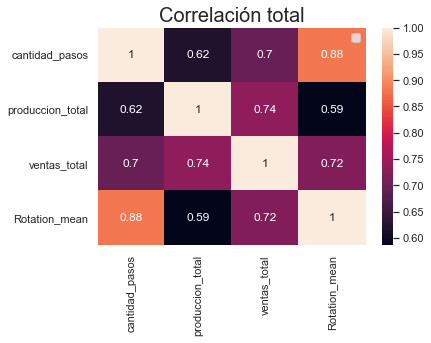

In [45]:
### Correación
sns.heatmap(dataset.corr(method= "pearson"),annot= True)
plt.title("Correlación total", size=20)
plt.legend()
plt.show()

Los resultados arrojados por el gráfico de correlación son muy interesantes. Notamos que existe una alta correlación entre la media del trabajo privado y el flujo vehicular del Peaje Illia, dándonos una correlación de casi un 90%. Otras de las variables que pueden explicar el flujo vehicular puede ser la venta de vehículos, la producción de vehiculos no es una variable que nos dé un resultado satisfactorio. A través de este análisis pudimos corroborar que los datos seleccionados, junto con los del proyecto 3 son buenos y vamos por un camino correcto.

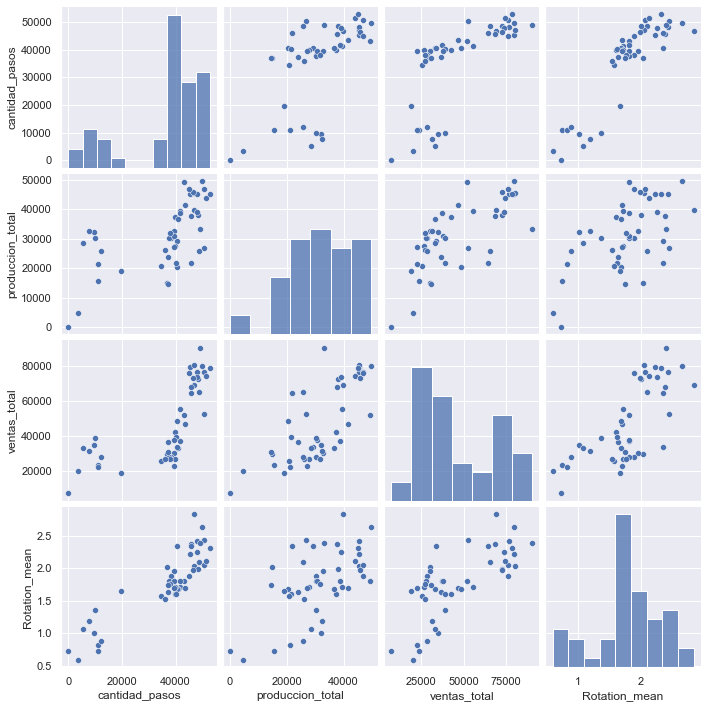

In [52]:
# Haremos un grafico que sea general para todas las variables y ver cuales de ellas, puedan tener algun tipo de relacion.
sns.pairplot(dataset)

---

#### Escalado de datos.

Realizaremos un escaldao de los datos, ya que contamos con un dataset con distintas magnitudes, el escalado lo realizaremos entre valores máximos y minímos, respetando las magnitudes de cada uno, para que también podamos graficar a todos de manera conjunta.

In [53]:
# Realizaremos el escalado utilizando de la libreria de Scikit-Learn MinMaxScaler, el escalado será entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

In [54]:
# Escalado y nueva variable con los datos ya escalados.
scaler = MinMaxScaler().fit_transform(dataset.values)
data_df = pd.DataFrame(scaler,index = dataset.index, columns = dataset.columns)
data_df

,cantidad_pasos,produccion_total,ventas_total,Rotation_mean
fecha,,,,
2017-01-31,0.957848,0.538959,0.547485,0.821758
2017-02-28,0.923519,0.517914,0.697651,0.669900
2017-03-31,0.888059,0.799013,0.742013,1.000000
2017-04-30,0.868826,0.759863,0.731989,0.797686
2017-05-31,0.861085,0.911751,0.869726,0.722981
2017-06-30,0.890628,0.916242,0.877589,0.644538
2017-07-31,0.919638,0.768684,0.787149,0.624783
2017-08-31,0.913159,0.911530,0.835654,0.817219
2017-09-30,0.960731,0.945746,0.829519,0.652859


##### Notamos que el escalado fue existoso, ya que en todas las columnas hay valores que van desde el 0 al 1. A continuación haremos un gráfico de las 3 series a la vez.

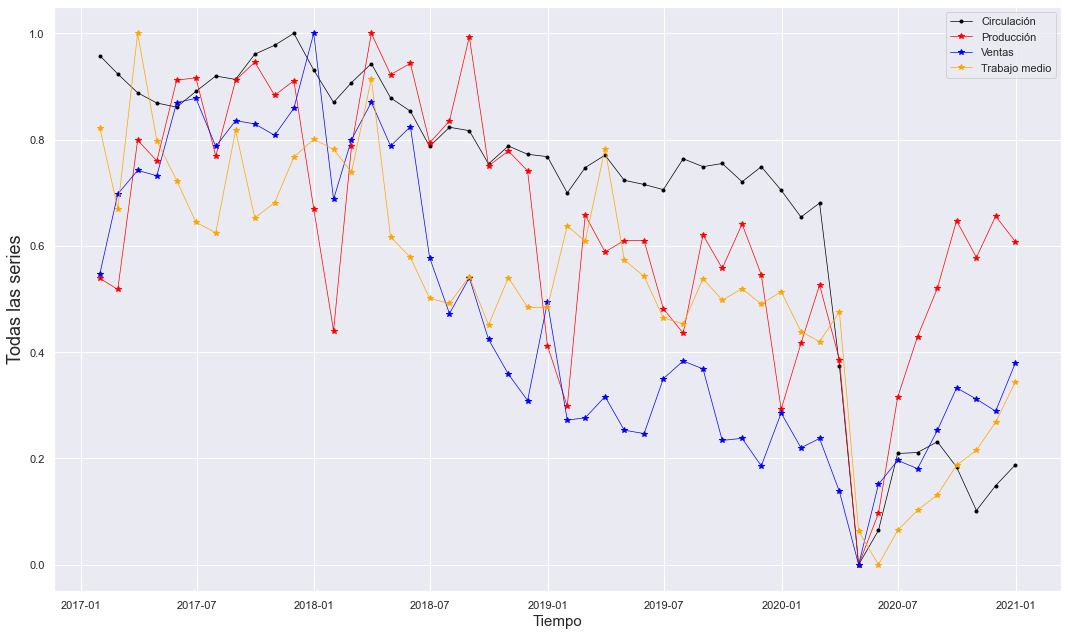

In [55]:
# Las 3 series.
plt.figure(figsize= (15,9))
plt.plot(data_df.cantidad_pasos, marker =".", linestyle = "-", linewidth = 0.7, label = "Circulación", color = "black")
plt.plot(data_df.produccion_total, marker ="*", linestyle = "-", linewidth = 0.7, label = "Producción", color = "red")
plt.plot(data_df.ventas_total, marker ="*", linestyle = "-", linewidth = 0.7, label = "Ventas", color = "blue")
plt.plot(data_df.Rotation_mean, marker ="*", linestyle = "-", linewidth = 0.7, label = "Trabajo medio", color = "orange")
plt.xlabel("Tiempo", size=15)
plt.ylabel("Todas las series", size=18)
plt.legend()
plt.tight_layout()
plt.show()

Al observar el gráfico, podemos observar que todas las variables tienen las mismas magnitudes, observando los valores del eje Y. Lo mas sencillo de identificar es el efecto de la cuarentena, pudiendo observarse ese efecto en todas las variables, viendo la caida abrupta y marcada que se da de un mes al otro. Prestando atención a este efecto, notamos que el empleo medio del sector privado tiene un restraso con respecto a las otras variables, siendo quizas una variable mas sensible a éste tipo de cambio abrupto. Observamos que al mes siguiente de mayo, todas las varibles tienen un rebote, pero el empleo siguió cayendo para luego del mes siguiente recuperarse aprovechando el efecto de las otras variables. Esto puede deberse a que como sabemos, los agentes económicos tienden a reorganizar su estructura productiva a largo plazo, siendo ésta una respuesta a la recuperación tardia.

### Conclusión:
Notamos que todas las series tienen una tendencia a la baja, sin embargo ésto no significa que sean todas iguales en su comportamiento. Sabemos que todas las variables económicas pueden tener una volatilidad que vuelve un poco mas impredecible saber que ocurrirá mañana y mas si nos situamos en Argentina con la volatilidad que tiene. Cada variable influye a la otra en ciertos matices, lo veremos a continuación con la preparación de los datos y el proceso de modelado de los mismos.

---

### Modelado y pruebas.
Acontinuación, respetando el flujo de trabajo que propusimos al principio, vamos a utilizar de modelo Benchmark el modelo realizado en el proyecto 3, el Sarimax. Se realizará con sus parámetros por defecto (debido al costo computacional). Ahora lo único que haremos es agregarle una variable exógena para ver que tanto influye en la misma. Finalizado ésto, llevaremos a cabo la implementación de un modelo VARMAX atendiendo a los requisitos que el modelo exije.

El modelo VARMAX exije que se realicen diferentes tipos de puebas. Dichas pueden llevarse a cabo previamente al modelado. Vamos a probar en primer lugar que serie causa una y otra, cuan integradas están y si son estacionarias o no. Usaremos la prueba de causalida de Granger (Es un test consistente en comprobar si los resultados de una variable sirven para predecir a otra variable) y la prueba de cointegracion de Johansen.

#### Prueba de causalidad de Granger.
La base del VARMAX es que cada una de las series de timpo se influyen entre si. Es decir, puede predecir los valores de una serie con valores pasados de si misma con otras series del dataset. Se puede predecir esta relación realizando la prueba de causalidad de Granger que la haremos a continuación y posteriormente explicaremos los resultados.

In [56]:
from statsmodels.tsa.stattools import grangercausalitytests


In [57]:
# Prueba de Causalidad de Granger

# la prueba para todos los retrasos hasta maxlag.
maxlag = 12
test = 'ssr_chi2test'

def granger_causation_matrix(data, variables, test = 'ssr_chi2test', verbose = False):
    df= pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index =variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose = False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f"Y = {r}, X = {c}, P Values = {p_values}")
            min_p_values = np.min(p_values)
            df.loc[r,c] = min_p_values
    df.columns = [var +"_x" for var in variables]
    df.index = [var + "_y" for var in variables]
    return df

granger_causation_matrix(data_df, variables=data_df.columns)

,cantidad_pasos_x,produccion_total_x,ventas_total_x,Rotation_mean_x
cantidad_pasos_y,1.0000,0.0072,0.0026,0.0000
produccion_total_y,0.0287,1.0000,0.0000,0.0127
ventas_total_y,0.0605,0.1543,1.0000,0.0000
Rotation_mean_y,0.0000,0.0001,0.0000,1.0000


Las columnas son las series predictoras (X) y las filas es la variable de respuesta (Y). Si un valor-p dado es mayor al nivel de significancia (0.05), entonces la serie X correspondiente (columna) causa la Y (fila). La causalidad de Granger prueba la hipótesis nula de que los coeficientes de los valores pasados en la ecuación de regresión son cero. En otras palabras, los valores de la serie temporal (X) no causa la otra serie (Y). Entonces, si el valor P obtenido de la pruebaes menor que el nivel de significancia de 0.05, entonces podemos rechazar con seguridad la hipótesis nula.

En los resultados obtenidos en la tabla anterior, podemos observar que no todas las variables (series de tiempo), en el sistema se causan indistintamente entre si. Notamos que la cantidad de pasos no cauasan el total de ventas pero la que mas cointegrada se encuentra es el trabajo medio. También podemos notar que la producción no causa a las ventas pero si viceversa, quizas por algo obvio siendo que las ventas causan la producción. Nos quedaremos con que la media del trabajo privado es la que mejor causa las demás variables.

#### Prueba de Cointegración de Johansen.

Esta prueba ayuda a establecer la presencia de una conexión estadísticamente significativa entre dos o mas series de tiempo. Decimos que dos o mas series están cointegradas si las mismas se mueven conjuntamente a lo largo del tiempo y las diferencias entre ellas son estables (es decir estacionarias), aún cuando cada serie en particular contenga una tendencia estocástica y sean por lo tanto no estacionaria. De aquí que la cointegración refleja la presencia de un equilibrio a largo plazo hacia el cual converge nuestras series de tiempo a lo largo del tiempo.

In [58]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [59]:
def cointegration_test(df, alpha=0.05):
    
    out = coint_johansen(df,-1, 5)
    d = {"0.90":0, "0.95":1, "0.99":2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length = 6): 
        return str(val).ljust(length)
    
    # summaary
    print("Name  ::  Test Stat > C(95%)   => Signif  \n","--"*20)
    for col,trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), "::", adjust(round(trace,2),8), ">" ,adjust(cvt,8)," => ", trace > cvt)
        
cointegration_test(dataset)        

Name  ::  Test Stat > C(95%)   => Signif  
 ----------------------------------------
cantidad_pasos :: 62.44    > 40.1749   =>  True
produccion_total :: 24.9     > 24.2761   =>  True
ventas_total :: 4.95     > 12.3212   =>  False
Rotation_mean :: 2.14     > 4.1296    =>  False


Resulta interesante notar que las unicas series estadisticamente integradas son la cantidad de pasos y la producción de vehiculos, algo que anteriormente no habia ocurrido cuando hicimos la correlación del EDA. Cada una de las dos precisa un numero de rezagos menos que las demas series, y entre ellas podrian ser las mejores que se adecuen a nuestro trabajo. Sin embargo tenemos muy buenos resultados con el trabajo medio registrado. Seguiremos investigando con cual serie haremos nuestro modelo VARMAX.

#### Test de Dickey-Fuller.

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:
def adfuller_test (dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    print("1- T-valor : ", dftest[0])
    print("2- P-valor : ", dftest[1])
    print("3. LAGS : ", dftest[2])
    print("4. Cantidad de valores observados utilizados para AIC Regression:", dftest[3])
    print("5.Valores Criticos : ")
    for key, val in dftest[4].items():
        print("\t",key,": ",val)

In [62]:
print("Cantidad de pasos")
print(adfuller_test(dataset.cantidad_pasos))
print("--------------------------------------")
print("Produccion total")
print(adfuller_test(dataset.produccion_total))
print("--------------------------------------")
print("Ventas total")
print(adfuller_test(dataset.ventas_total))
print("--------------------------------------")
print("Trabajo Privado Medio")
print(adfuller_test(dataset.Rotation_mean))
print("--------------------------------------")

Cantidad de pasos
1- T-valor :  -0.031049103202282293
2- P-valor :  0.9558877775303449
3. LAGS :  2
4. Cantidad de valores observados utilizados para AIC Regression: 45
5.Valores Criticos : 
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
None
--------------------------------------
Produccion total
1- T-valor :  -0.3159474674322668
2- P-valor :  0.9232151283717772
3. LAGS :  10
4. Cantidad de valores observados utilizados para AIC Regression: 37
5.Valores Criticos : 
	 1% :  -3.6209175221605827
	 5% :  -2.9435394610388332
	 10% :  -2.6104002410518627
None
--------------------------------------
Ventas total
1- T-valor :  -0.9569101822834271
2- P-valor :  0.7686542643210625
3. LAGS :  2
4. Cantidad de valores observados utilizados para AIC Regression: 45
5.Valores Criticos : 
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
None
--------------------------------------
Trabajo Privado Medio
1- T-valor :  -2.043192805750

#### Conclusión
Sabemos que la distribución T es una distribución similar a la de Gauss (por lo menos gráficamente), por lo tanto los valores críticos en este caso podría traducirse de la siguiente manera:
* Para una significancia del 10%, representa el 90% de los datos.
* Para una significancia del 5%, representa el 95% de los datos.
* Para una significancia del 1%, representa el 99 de los datos.

Un valor T mayor al que reprenta los valores críticos, debe rechazarse la hipótesis nula, dando por sentado la hipótesis alternativa de que la serie es estacionaria.

Por último al imprimir el Valor de P,debemos tener en cuanta para terminar de estar seguros:
- Si p-valor>0.5, se acepta la hipotesis nula;
- Si p-valor<0.5, se rechaza la hipotesis nula y se acepta la hipotesis alternativa (por convención, el nro limite es 0.5).

### Conclusión:
Podemos observar que P=0.0,  claramente la probabilidad de que la H0 sea aceptada es insuficiente estadisticamente. Confirmamos la hipótesis  de que todas las series son no estacionarias, por lo tanto tendremos que diferenciarlas hasta que las mismas sean estacionarias, pudiendo confirmarlo en el caso de que t sea menor que el valor critico, hecho eso y su posterior analisis podremos aceptar la hipotesis nula siendo la serie estacionaria.

In [63]:
# Diferenciacion.
data_differenced = dataset.diff().dropna()
data_differenced

,cantidad_pasos,produccion_total,ventas_total,Rotation_mean
fecha,,,,
2017-02-28,-1809.650922,-1045.0,12433.0,-0.3413
2017-03-31,-1869.252304,13958.0,3673.0,0.7419
2017-04-30,-1013.854839,-1944.0,-830.0,-0.4547
2017-05-31,-408.016129,7542.0,11404.0,-0.1679
2017-06-30,1557.316129,223.0,651.0,-0.1763
2017-07-31,1529.264516,-7327.0,-7488.0,-0.0444
2017-08-31,-341.548387,7093.0,4016.0,0.4325
2017-09-30,2507.717204,1699.0,-508.0,-0.3694
2017-10-31,883.379570,-3107.0,-1776.0,0.0638


In [64]:
print("---Serie Diferenciada---")
print("Cantidad de pasos")
print(adfuller_test(data_differenced.cantidad_pasos))
print("--------------------------------------")
print("Produccion total")
print(adfuller_test(data_differenced.produccion_total))
print("--------------------------------------")
print("Ventas total")
print(adfuller_test(data_differenced.ventas_total))
print("--------------------------------------")
print("Trabajo Privado Medio")
print(adfuller_test(data_differenced.Rotation_mean))
print("--------------------------------------")

---Serie Diferenciada---
Cantidad de pasos
1- T-valor :  -5.946392189320097
2- P-valor :  2.1990731655039353e-07
3. LAGS :  1
4. Cantidad de valores observados utilizados para AIC Regression: 45
5.Valores Criticos : 
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
None
--------------------------------------
Produccion total
1- T-valor :  -4.057886617499649
2- P-valor :  0.0011359599299073679
3. LAGS :  9
4. Cantidad de valores observados utilizados para AIC Regression: 37
5.Valores Criticos : 
	 1% :  -3.6209175221605827
	 5% :  -2.9435394610388332
	 10% :  -2.6104002410518627
None
--------------------------------------
Ventas total
1- T-valor :  -6.545485604608794
2- P-valor :  9.121871445945961e-09
3. LAGS :  1
4. Cantidad de valores observados utilizados para AIC Regression: 45
5.Valores Criticos : 
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
None
--------------------------------------
Trabajo Privado Medio


Convertimos todas las series en estacionarias llevando a cabo solamente una diferenciación, lo que resulto ser muy positivo. Estamos en condiciones de seguir con el proceso de modelado.

#### Conclusión:
Hemos realizado varias pruebas que exigen estos tipos de modelos VARMAX. En primer lugar realizamos una prueba para verificar que serie causa una y otra, cuan cointegradas estan y si eran estacionarias o no, realizando posteriormente la diferenciación para hacerlas estacionarias. De los resutados obtenidos, seleccionaremos aquellas variables que mejores test hayan arrojado para nuestro modelo. Las variables que seleccionaremos son la cantidad de peajes (siendo la variable objetivo), y el ratio de trabajo registrado en el sector privado. Esta última es la que mejor resultado dió al realizar la autocorrelación respecto a "cantidad_pasos", mostrando también una causalidad eficiente. Las otras variables no son malas, pero no cumplen los requisitos para nuetro modelo, no siendo apropiadas para el mismo. Probablemente para otro tipo de problema sean mas eficientes.

----

### Train y Test

Realizaremos una separación de Train y Test previamente a implementar el modelo Varmax, para llevar a cabo un modelo Bechmarck. Del dataset diferenciado, utilizaremos las variables "cantidad_pasos y rotation_mean". Si bien para el benchmarck ajustaremos el dataframe_train y luego se utilizará para pronosticar los primeros 12 meses, no será necesaro utilizar ciertas diferencias para VARMAX.

In [65]:
# Creamos una variable llamada "senial", que nos permitirá estacionalizar la serie y luego comparar el error en los modelos.
senial = dataset[["cantidad_pasos","Rotation_mean"]]
star,end = "2017-01-31","2020-12-31"
star1,end1= "2019-12-31","2020-12-31"
train_real=senial[star:end]
test_real=senial[star1:end1]
print(train_real.shape)
print(test_real.shape)

# Utilizaremos la variablle "data_differenced" con la serie ya estacionaria
dif = data_differenced[["cantidad_pasos","Rotation_mean"]]

# Al deiferenciar la serie, perderemos el primer dato, por lo tanto, deberemos eliminar el dato que se pierde de la serie original
lim_error = "2017-01-31"
pred_rmse=senial[(senial.index > lim_error)]

(48, 2)
(13, 2)


### Benchmarck
Usaremos el resampleo mensual de la variable "cantidad_pasos" del 2017 hasta el 2020 y usaremos de variable exógena el empleo registrado en el sector privado

Utilizaremos de modelo Benchamarck el modelo SARIMAX y como variable exógena el empleo privado. Si bien ya estacionamos la seri, el SARIMAX tiene un componente incorporado que estaciona por si sola la serie. Pasaremos los datoss crudos para ver que nos deja los datos


In [66]:
# Previamente necesitamos conocer los componentes AR y MA para nuestro modelo SARIMAX.Utilizaremos la correlación parcial y tradicional.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


<function matplotlib.pyplot.show(close=None, block=None)>

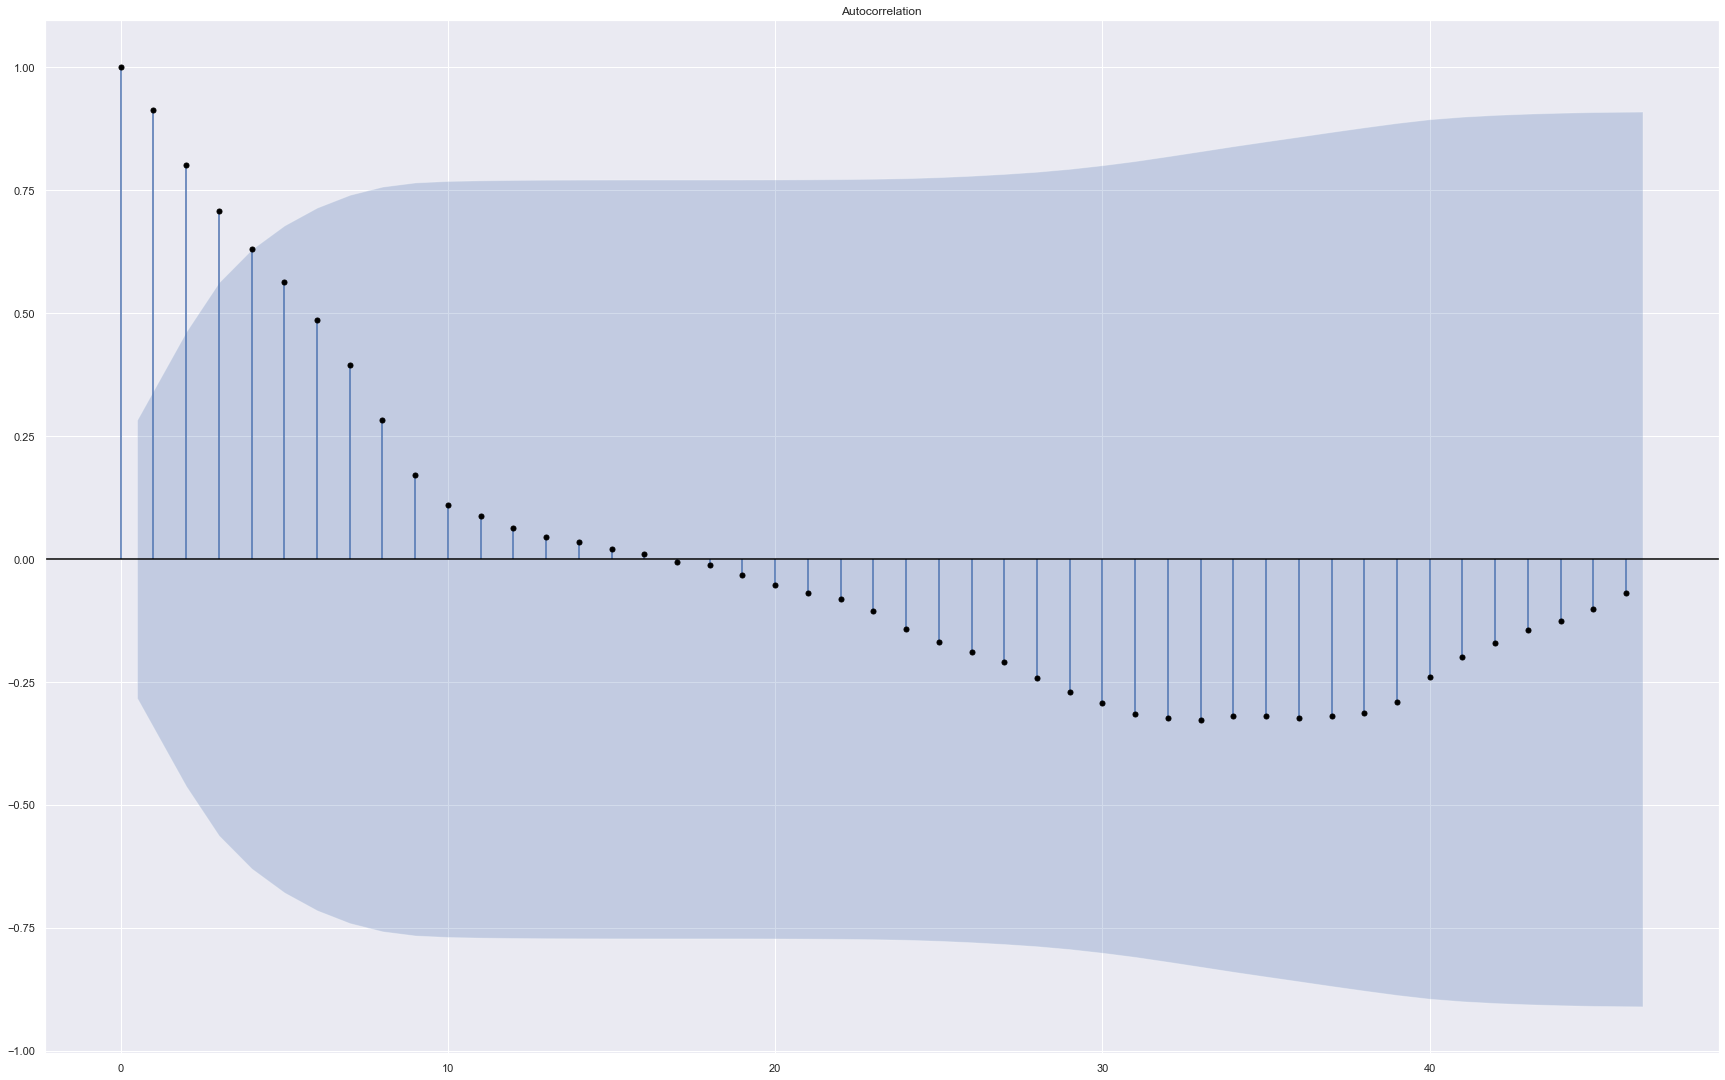

In [67]:
fig, ejes = plt.subplots(figsize=(30,19))
plot_acf(dataset.cantidad_pasos, lags = 46, ax=ejes, color = "black",use_vlines=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

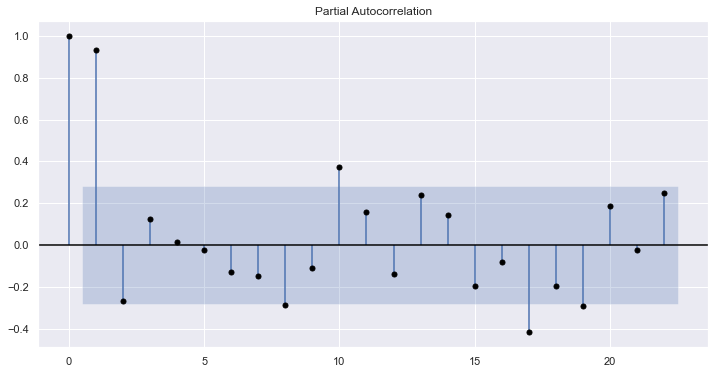

In [68]:
fig,ejes = plt.subplots(figsize=(12,6))
plot_pacf(dataset.cantidad_pasos, lags=22,ax=ejes,color="black")
plt.show

Obtenemos de los gráficos un AR=2 y un MA=4

In [69]:
# A parte de las librerias ya conocidad, cargaremos tambien otras herramientas como intertools que  nos permite interar de manera eficaz sin utilizar tanto codigo
#y warnings para evitar avisos indeseados que afecten el rendimiento de la computadora
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
import warnings

In [70]:
#Añadimos la variable exogena.
exog = dataset.Rotation_mean

# Cantidad de diferenciaciones que queremos que haga el modelo
d = range(0,3)

# Rango de valores correspondientes a AR y MA.
p=q= range(2,5)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
             for x in list(itertools.product(p,d,q))]
print("Ejemplos de combinaciones de parametros para SARIMAX")
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[3]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX
SARIMAX:(2, 0, 3) x (2, 0, 3, 12)
SARIMAX:(2, 0, 3) x (2, 0, 4, 12)
SARIMAX:(2, 0, 4) x (2, 1, 2, 12)
SARIMAX:(2, 0, 4) x (2, 1, 3, 12)


In [ ]:
Probamos la grilla buscando los mejores parómetros.
warnings.filterwarnings("ignore")
#for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX (date,
                                           order= param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
        except:
            continue

In [71]:
# Entrenaremos el modelo con la última combinación del ciclo for para el SARIMAX, dado el menor AIC.
# Entrenamos el modelo con la ultima combinación del ciclo For para el sarimax.
model = sm.tsa.statespace.SARIMAX(dataset.cantidad_pasos,
                                order=(2, 1, 2),
                                seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                 exog=exog)

resultado = model.fit()
resultado.summary()

C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:431: Run

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     cantidad_pasos   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(2, 2, 2, 12)   Log Likelihood                   0.000
Date:                            Thu, 01 Jul 2021   AIC                             20.000
Time:                                    06:34:08   BIC                                nan
Sample:                                01-31-2017   HQIC                               nan
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Rotation_mean  7569.2179         -0       -inf      0.000    7569.218    7569.218
ar.L1            -0.4922         -0        inf      0.000      -0.492      -0.492
ar.L2            -0.8655         -0        inf      0.000      -0.865      -0.865
ma.L1             0.4678         -0       -inf      0.000       0.468       0.468
ma.L2             0.8024         -0       -inf      0.000       0.802       0.802
ar.S.L12               0         -0        nan        nan           0           0
ar.S.L24               0         -0        nan        nan           0           0
ma.S.L12               0         -0        nan        nan           0           0
ma.S.L24               0         -0        nan        nan           0           0
sigma2         4.212e+07         -0       -inf      0.000    4.21e+07    4.21e+07
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""



Podemos notar que para el coeficiente de Rotation_mean, nos da un resultado que nos perimte confirmar que es una de las variables que mas peso le da a la serie "cantidad_pasos". También podemos observar que "ma.L1" y "ma.L2" son variables de peso para el modelo. Al observar P>|z|, cada valor es menor a 0.05 (valor-p), hasta ma.L2. Por lo tanto, éstos resultados nos dan a entender que hasta esos parámetros, les da buenas características al SARIMAX.

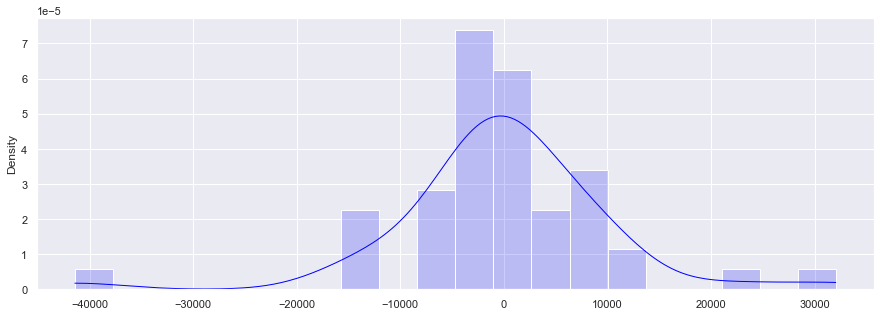

In [72]:
# Gráfico de distribución de los residuos.
plt.figure(figsize=(15,5))
sns.histplot(data=resultado.resid, stat = "density", kde = True, line_kws = {"linewidth":1}, color = "blue", alpha = 0.2)
plt.show()

Podemos observar que los residuos se distribuyen normalmente, con una media cero, por lo tanto el modelo está optimizado de la mejor manera.

---

### Probaremos con las dos estrategias para predecir, One-Step y Multi-Step

#### One-Step año 2020

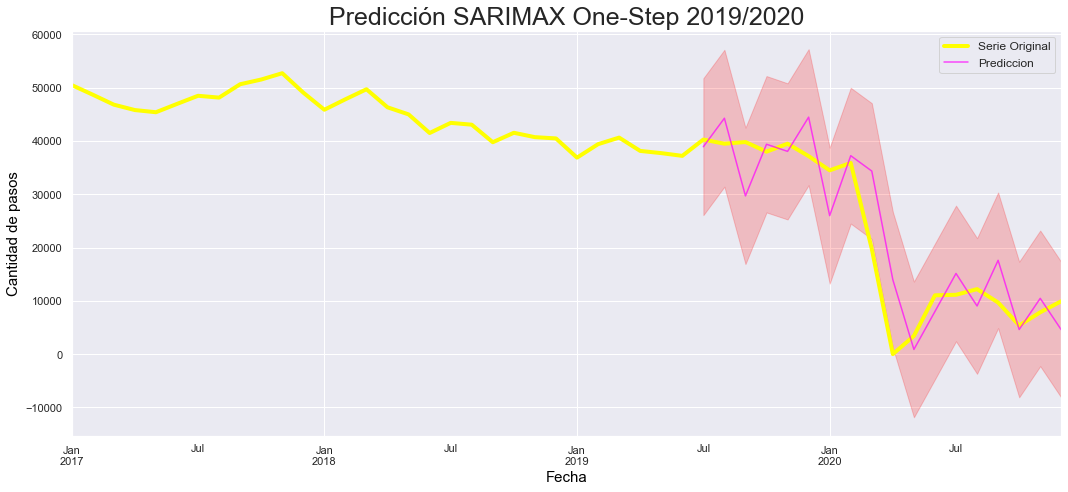

In [73]:
pred = resultado.get_prediction(start=datetime.datetime(2019,7,31), dynamic=False)
pred_ci = pred.conf_int()
ax = dataset.cantidad_pasos['2017':].plot(label='Serie Original',color='yellow',lw = 4,figsize=(15,7))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='magenta')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title("Predicción SARIMAX One-Step 2019/2020", fontsize=25)
ax.set_xlabel('Fecha',color='black',size=15)
ax.set_ylabel('Cantidad de pasos',color='black',size=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [74]:
y_predf1 = pred.predicted_mean
y_real = dataset.cantidad_pasos['2019-07-31':]

error_one1 = np.sqrt(mean_squared_error(y_predf1, y_real))
print('RMSE de One Step 2020: ', error_one1)

RMSE de One Step 2020:  6695.3309005466035


Notamos que la estrategia One Step no funciona mal, pero observamos un ruido presente en la serie que puede deberse a que añadimos la variable exógena al modelo. Analizando el gráfico, notamos que hay una tendencia a que la predicción realizada siga a los valores originales, notamos que predice los valores dado por el Covid (caida abrupta), pero luego le cuesta predecir correctamente.

#### Multi-Step año 2020.

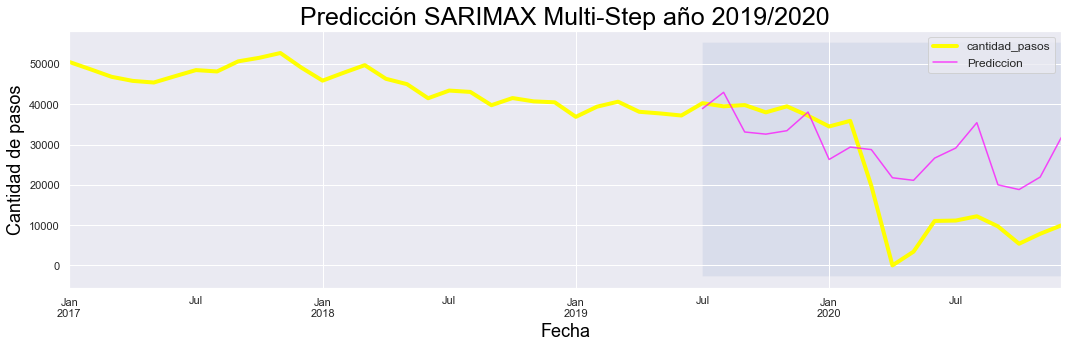

In [75]:
pred_dynamic = resultado.get_prediction(start=datetime.datetime(2019,7,31), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = dataset.cantidad_pasos['2017':].plot(color='yellow',lw = 4, figsize=(15, 5))

pred_dynamic.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, figsize=(15, 5), color='magenta')

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,7,31), dataset.index[-1],
                 alpha=0.1, zorder=-1)
plt.title("Predicción SARIMAX Multi-Step año 2019/2020", color= 'black', fontsize=25)
ax.set_xlabel('Fecha',color='black',fontsize=18 )
ax.set_ylabel('Cantidad de pasos',color='black', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [76]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = dataset.cantidad_pasos['2019-07-31':]


rmse_sm = np.sqrt(mean_squared_error(y_truth,y_forecasted ))
print(f'RMSE de SARIMAX Multi-Step es: {rmse_sm}')

RMSE de SARIMAX Multi-Step es: 13271.616197763633


Como ocurrió en el proyecto pasado, una estrategia de Multi-Step no iba a ser buena para este tipo de problemas, en el gráfico observamos lo mal que predice la caida por motivos del Covid.
##### Conclusiones:
Observamos que el modelo Benchmark presenta errores a la hora de predecir. Al añadirle una variable exógena, la misma produce mucho ruido con respecto a la serie original. Sabemos que no son modelos apropiados para éste tipo de problemas, pero nos sirve de parámetro para saber como se comportan los datos, siendo la primera vez que se realiza un trabajo de éstas características con múltiples series de tiempo. También nos deja la pauta que debemos utilizar para los problemas multiseries rezagos de tiempo mas largos, debido a que el dataset es bastate pequeño, al mencionar ésto, hacemos referencia a que deberíamos utilizar datos mensuales de años anteriores o verificar si se puede utilizar un resampleo semanal o diario.

---

### VARMAX

Es un modelo que se destaca por su versatilidad, ya que depende de los parámetros que le coloquemos. El mismo puede funcionar:
* Como un modelo VAR (Vectores Autorregresivos) si colocamos unicamente el valor (p).
* Como un modelo VMA (Vectores de Media Movil) si colocamos unicamente el valor (q).
* Como un modelo VARMA (Vectores Autorregresivos con Media Movil) si colocamos los valores de (p,q).
Para éste caso en particular, de forma similar al SARIMAX, el VARMAX le agrega (si asi lo deseamos), un factor exógeno agregando más información al modelo, con respecto a aquellos sucesos que no pueda explicar (por ejemplo para catastrofes, crisis económicas, sucesos estocasticos)

Este modelo se llevará a cabo con la estrategia de comparar el mismo modelo pero con series de datos ditintas.

El proceso que se llevará a cabo será:
* Utilizar los datos crudos sin estacionar, para observar que error arrojan nuestras variables.
* Luego entrenaremos un modelo con los datos corregidos para hacerlo estacionario. El objetivo de éste punto es comparar el modelo con los parámetros correctos VS los no estacionarios a modo de ser una especie de modelo Benchmark del VARMAX.
* Por último, agregaremos una variable exógena al modelo, con el objetivo de analizar si le agrega mas información a la serie que queremos predecir.

In [77]:
# De Statsmodels, importamos nuestro modelo
from statsmodels.tsa.statespace.varmax import VARMAX

In [78]:
senial

,cantidad_pasos,Rotation_mean
fecha,,
2017-01-31,50492.258065,2.4353
2017-02-28,48682.607143,2.0940
2017-03-31,46813.354839,2.8359
2017-04-30,45799.500000,2.3812
2017-05-31,45391.483871,2.2133
2017-06-30,46948.800000,2.0370
2017-07-31,48478.064516,1.9926
2017-08-31,48136.516129,2.4251
2017-09-30,50644.233333,2.0557


In [79]:
# Rango corrspondiente a AR y MA
p=q=range(1,13)
pq=list(itertools.product(p,q)) #encontrar el producto cartesiano

In [80]:
# Búsqueda de los mejores parámetros que se ajustan a nuestro modelo.
warnings.filterwarnings("ignore")
for order in pq:
    try:
        varmax=VARMAX(senial, order=order)
        res=varmax.fit()
        print("VARMAX",order)
        print("AIC: ", res.aic)
    except:
        continue

VARMAX (1, 1)
AIC:  944.5245915289933
VARMAX (1, 2)
AIC:  947.6589037096383
VARMAX (1, 3)
AIC:  952.456733341877
VARMAX (1, 4)
AIC:  954.6802822277864
VARMAX (1, 5)
AIC:  965.8663868595172
VARMAX (1, 6)
AIC:  967.1986628227999
VARMAX (1, 7)
AIC:  1033.6022142290478
VARMAX (1, 11)
AIC:  1039.1136721962596
VARMAX (1, 12)
AIC:  1047.1136721962596
VARMAX (2, 1)
AIC:  946.6238084881139
VARMAX (2, 2)
AIC:  947.6585983058392
VARMAX (2, 3)
AIC:  958.592326178721
VARMAX (2, 4)
AIC:  961.6381260638207
VARMAX (2, 5)
AIC:  967.1327439888537
VARMAX (2, 6)
AIC:  969.8455263591931
VARMAX (2, 8)
AIC:  970.7520914753034
VARMAX (2, 9)
AIC:  978.4751185787078
VARMAX (2, 10)
AIC:  1023.8390228255261
VARMAX (3, 1)
AIC:  948.6936041966542
VARMAX (3, 2)
AIC:  955.908503919801
VARMAX (3, 3)
AIC:  965.6155233747929
VARMAX (3, 4)
AIC:  965.8397623753262
VARMAX (3, 5)
AIC:  980.2190626887622
VARMAX (3, 6)
AIC:  974.8694297639065
VARMAX (3, 7)
AIC:  997.1402990178881
VARMAX (3, 9)
AIC:  986.7417796712466
VARMAX (

In [81]:
modelo_varmax= VARMAX(senial, order=(1,1)).fit()
result_model=modelo_varmax.predict()
modelo_varmax.summary()

Dep. Variable:,"['cantidad_pasos', 'Rotation_mean']",No. Observations:,48
Model:,"VARMA(1,1)",Log Likelihood,-459.262
,+ intercept,AIC,944.525
Date:,"Thu, 01 Jul 2021",BIC,968.850
Time:,07:02:34,HQIC,953.717
Sample:,01-31-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.21, 0.07",Jarque-Bera (JB):,"91.74, 11.12"
Prob(Q):,"0.65, 0.79",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"7.67, 0.26",Skew:,"-1.69, 0.97"


#### Gráfico y error

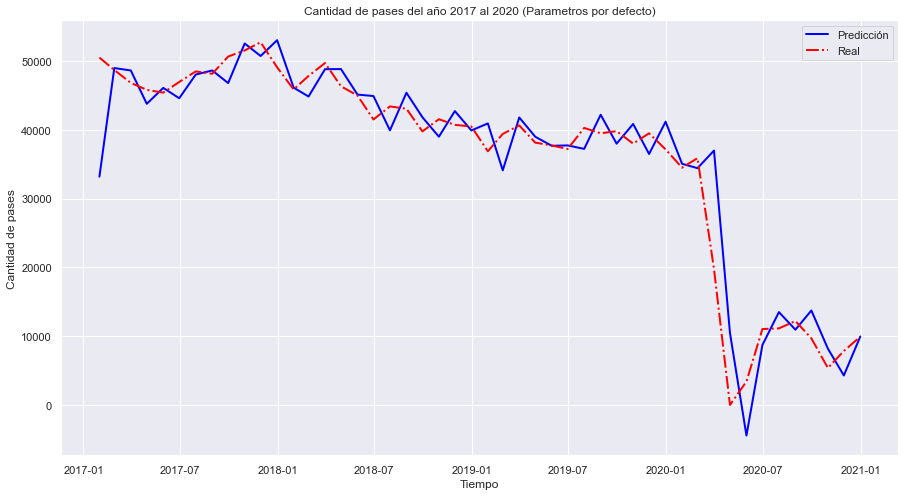

In [82]:
# Gráfico.
plt.figure(figsize=(15,8))
plt.plot(result_model.cantidad_pasos, label="Predicción", ls="-", lw=2,color="blue")
plt.plot(senial.cantidad_pasos, label="Real", ls="-.", lw=2,color="red")

plt.title("Cantidad de pases del año 2017 al 2020 (Parametros por defecto)")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pases")
plt.legend()
plt.show()

In [83]:
y_predf_varmax = result_model.cantidad_pasos
y_real_varmax = senial.cantidad_pasos

error_varmax_pases = np.sqrt(mean_squared_error(y_predf_varmax, y_real_varmax))
print('RMSE Cantidad_pasos: ', error_varmax_pases)

RMSE Cantidad_pasos:  4630.0959812742185


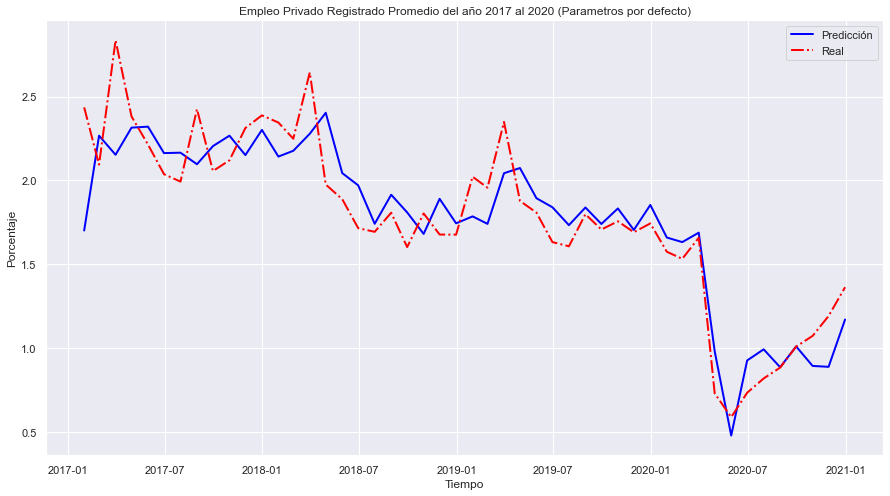

In [84]:
# Gráfico.
plt.figure(figsize=(15,8))
plt.plot(result_model.Rotation_mean, label="Predicción", ls="-", lw=2,color="blue")
plt.plot(senial.Rotation_mean, label="Real", ls="-.", lw=2,color="red")

plt.title("Empleo Privado Registrado Promedio del año 2017 al 2020 (Parametros por defecto)")
plt.xlabel("Tiempo")
plt.ylabel("Porcentaje")
plt.legend()
plt.show()

In [85]:
y_predf_varmax = result_model.Rotation_mean
y_real_varmax = senial.Rotation_mean

error_varmax_pases = np.sqrt(mean_squared_error(y_predf_varmax, y_real_varmax))
print('RMSE Trabajo priv. Promedio: ', error_varmax_pases)

RMSE Trabajo priv. Promedio:  0.22814884250202527


A pesar de que no se estacionó la serie, los resultados obtenidos fueron buenos. Como sabemos, éstos tipos de modelos exigen que previamente las series se estacionalicen , por lo tanto ésto que acabamos de hacer es a modo de comparación para las siguientes pruebas. En la matriz de residuos podemos observar que tuvo un comportamiento bastante irregular, notamos que la predicción que hace son bastantes erráticas pero que siguen un patrón de comportamiento.

#### VARMAX sin variable exógena.

In [92]:
# Búsqueda de los mejores parámetros que se ajustan a nuestro modelo.
warnings.filterwarnings("ignore")
for order in pq:
    try:
        varmax=VARMAX(dif, order=order)
        res=varmax.fit()
        print("VARMAX",order)
        print("AIC: ", res.aic)
    except:
        continue

VARMAX (1, 1)
AIC:  923.7052185553633
VARMAX (1, 2)
AIC:  930.2000149481102
VARMAX (1, 3)
AIC:  932.9877504795402
VARMAX (1, 4)
AIC:  941.3785471510708
VARMAX (1, 5)
AIC:  940.7901216010089
VARMAX (1, 6)
AIC:  943.2414616457228
VARMAX (1, 8)
AIC:  942.4237383868922
VARMAX (1, 9)
AIC:  969.3230849376915
VARMAX (1, 12)
AIC:  1017.8505979905786
VARMAX (2, 1)
AIC:  928.5086741762653
VARMAX (2, 2)
AIC:  939.2580773837063
VARMAX (2, 3)
AIC:  937.5713647852907
VARMAX (2, 4)
AIC:  947.1560100108228
VARMAX (2, 5)
AIC:  939.7547469924741
VARMAX (2, 6)
AIC:  956.6009465809466
VARMAX (2, 7)
AIC:  1640.1352416105933
VARMAX (2, 8)
AIC:  948.0437485618145
VARMAX (2, 9)
AIC:  3267.97617964208
VARMAX (2, 11)
AIC:  1000.4240447265094
VARMAX (3, 1)
AIC:  934.7700652946844
VARMAX (3, 2)
AIC:  943.4672206711607
VARMAX (3, 3)
AIC:  952.0442705828431
VARMAX (3, 4)
AIC:  954.2306199043036
VARMAX (3, 5)
AIC:  956.7907574667258
VARMAX (3, 6)
AIC:  969.3341664573941
VARMAX (3, 8)
AIC:  958.8675242237935
VARMAX (

In [86]:
dif

,cantidad_pasos,Rotation_mean
fecha,,
2017-02-28,-1809.650922,-0.3413
2017-03-31,-1869.252304,0.7419
2017-04-30,-1013.854839,-0.4547
2017-05-31,-408.016129,-0.1679
2017-06-30,1557.316129,-0.1763
2017-07-31,1529.264516,-0.0444
2017-08-31,-341.548387,0.4325
2017-09-30,2507.717204,-0.3694
2017-10-31,883.379570,0.0638


In [87]:
modelo_var= VARMAX(dif, order=(1,1)).fit()
modelo_var.predict()
modelo_var.summary()

Dep. Variable:,"['cantidad_pasos', 'Rotation_mean']",No. Observations:,47
Model:,"VARMA(1,1)",Log Likelihood,-448.853
,+ intercept,AIC,923.705
Date:,"Thu, 01 Jul 2021",BIC,947.757
Time:,07:02:38,HQIC,932.756
Sample:,02-28-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.08, 0.16",Jarque-Bera (JB):,"63.96, 2.32"
Prob(Q):,"0.78, 0.69",Prob(JB):,"0.00, 0.31"
Heteroskedasticity (H):,"6.44, 0.22",Skew:,"-1.63, 0.46"


In [88]:
trans = pd.DataFrame(modelo_var.predict(),index = dif.index, columns=["cantidad_pasos","Rotation_mean"])
trans["cantidad_pasos_pred"] = senial["cantidad_pasos"].iloc[-47]+ trans["cantidad_pasos"].cumsum()
trans["Rotation_mean_pred"] = senial["Rotation_mean"].iloc[-47]+ trans["Rotation_mean"].cumsum()
trans

,cantidad_pasos,Rotation_mean,cantidad_pasos_pred,Rotation_mean_pred
fecha,,,,
2017-02-28,-549.814738,-0.015067,48132.792405,2.078933
2017-03-31,200.420655,0.090067,48333.213060,2.169000
2017-04-30,-2805.479453,-0.387342,45527.733607,1.781657
2017-05-31,1723.468781,0.092774,47251.202388,1.874432
2017-06-30,-2010.937272,-0.027796,45240.265116,1.846635
2017-07-31,1642.976837,0.232154,46883.241954,2.078789
2017-08-31,-1391.443642,0.080311,45491.798312,2.159100
2017-09-30,-362.928674,-0.091434,45128.869638,2.067666
2017-10-31,1277.022082,0.210021,46405.891720,2.277688


In [89]:
trans.head()

,cantidad_pasos,Rotation_mean,cantidad_pasos_pred,Rotation_mean_pred
fecha,,,,
2017-02-28,-549.814738,-0.015067,48132.792405,2.078933
2017-03-31,200.420655,0.090067,48333.213060,2.169000
2017-04-30,-2805.479453,-0.387342,45527.733607,1.781657
2017-05-31,1723.468781,0.092774,47251.202388,1.874432
2017-06-30,-2010.937272,-0.027796,45240.265116,1.846635


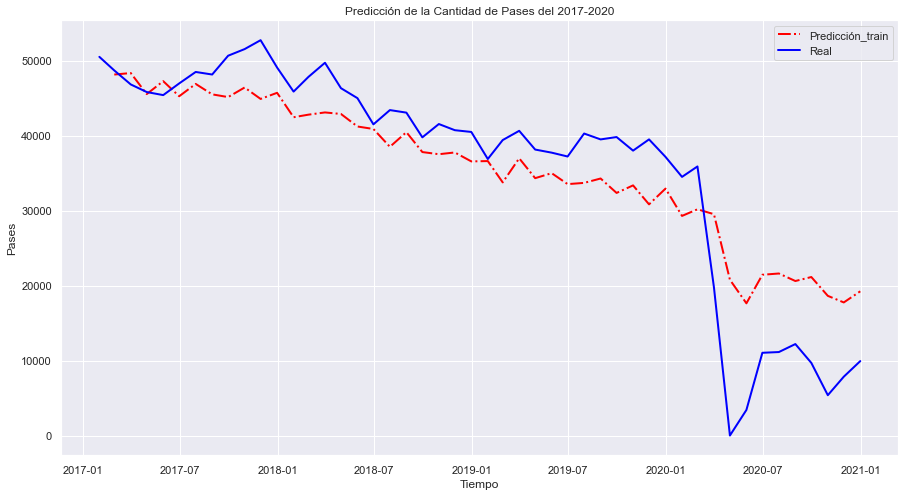

In [90]:
# Gráfico "cantidad_pasos".
plt.figure(figsize=(15,8))
plt.plot(trans.cantidad_pasos_pred, label="Predicción_train", ls="-.", lw=2,color="red")
plt.plot(senial.cantidad_pasos, label="Real", ls="-", lw=2,color="blue")

plt.title("Predicción de la Cantidad de Pases del 2017-2020")
plt.xlabel("Tiempo")
plt.ylabel("Pases")
plt.legend()
plt.show()

In [91]:
y_pred = trans.cantidad_pasos_pred
y_real = pred_rmse.cantidad_pasos
error_circul = np.sqrt(mean_squared_error(y_real,y_pred))
print("RMSE pases VARMAX", error_circul)

RMSE pases VARMAX 6872.718636930363


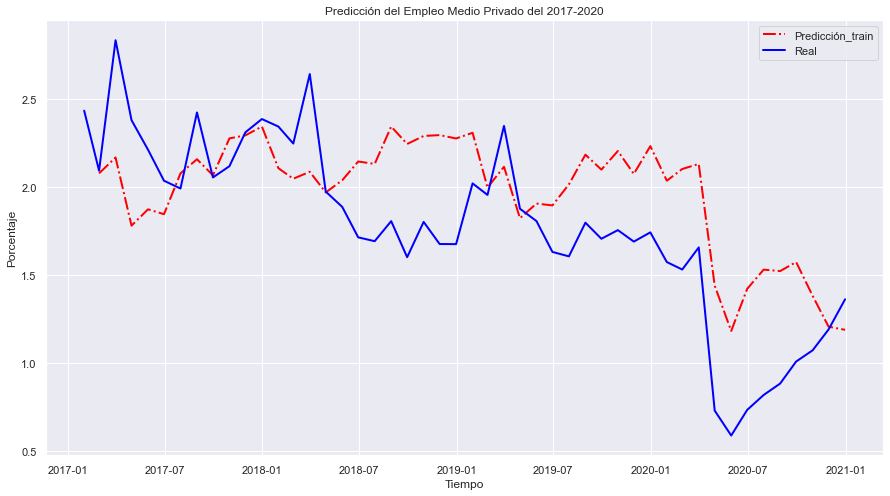

In [92]:
# Gráfico "Rotation_mean".
plt.figure(figsize=(15,8))
plt.plot(trans.Rotation_mean_pred, label="Predicción_train", ls="-.", lw=2,color="red")
plt.plot(senial.Rotation_mean, label="Real", ls="-", lw=2,color="blue")

plt.title("Predicción del Empleo Medio Privado del 2017-2020")
plt.xlabel("Tiempo")
plt.ylabel("Porcentaje")
plt.legend()
plt.show()

In [87]:
y_pred_tr = trans.Rotation_mean_pred
y_real_tr = pred_rmse.Rotation_mean
error_tr = np.sqrt(mean_squared_error(y_pred_tr,y_real_tr))
print("RMSE Empleo Promedio VARMAX", error_tr)

RMSE Empleo Promedio VARMAX 0.4201587666477983


#### Conclusión.
Al utilizar un modelo robusto como el VARMAX, notamos como los datos se ajustan de una manera aceptable. No nos olvidamos que el comportamiento que queremos predecir es el flujo vehicular, por lo tanto notamos que le cuesta predecir de una manera correcta al modelo, incluso podemos observar que el modelo VARMAX devuelve un error menor con las varibles sin estacionalizar. En los gráficos realizados, notamos que los datos reales y los predichos siguen un comportamiento similar comparado al comportamiento que tienen los valores reales al llegar al mes de marzo del 2020 cuando comienza la etapa de cuarenta. A partir de ese momento, los valores reales vs los valores predichos, tienen un coportamiento muy diferente, ésto afecta notablemente las predicciones que realiza el modelo. Notamos también que la serie utilizada del empleo interpreta de una manera correcta el comportamiento de la serie original.Podemos observar un comportamiento casi similar, que se da a partir del segundo semestre del año 2019, hasta febrero del 2020. Aclaramos que no es del todo buena porque predice con unos valores superiores a los valores reales, siendo mas sensible, es decir que predice bien pero no con los valores esperados. Por otro lado notamos que luego del efecto de la cuarentena, adopta un comportaamiento similar a la cantidad de pases para el 2020, reflejando lo dificil que se le hace al modelo ese cambio brusco que tuvo por la cuarentena ya que luego le cuesta retomar el crecimiento de la serie original.

---

### VARMAX con variable exógena.
Como variable exógena utilizaremos las ventas totales de vehículos y la producción total de vehículos, se espera que éstas variable se vea afectada por el empleo medio privado y afecte también la cantidad de vehículos que circulan.

La forma de trabajar será similar a la que realizamos anteriormente. Primero estacionalizaremos la serie para poder colocarla al modelo, luego realizaremos el entrenamiento, predicción, graficaremos y evaluaremos el error.

##### Ventas total

In [93]:
# Variable exógena
dataset.ventas_total

fecha
2017-01-31    52841
2017-02-28    65274
2017-03-31    68947
2017-04-30    68117
2017-05-31    79521
2017-06-30    80172
2017-07-31    72684
2017-08-31    76700
2017-09-30    76192
2017-10-31    74416
2017-11-30    78631
2017-12-31    90307
2018-01-31    64452
2018-02-28    73733
2018-03-31    79562
2018-04-30    72748
2018-05-31    75754
2018-06-30    55358
2018-07-31    46637
2018-08-31    52224
2018-09-30    42628
2018-10-31    37207
2018-11-30    33095
2018-12-31    48418
2019-01-31    30038
2019-02-28    30404
2019-03-31    33708
2019-04-30    28469
2019-05-31    27947
2019-06-30    36501
2019-07-31    39255
2019-08-31    38021
2019-09-30    26876
2019-10-31    27204
2019-11-30    22900
2019-12-31    31151
2020-01-31    25727
2020-02-29    27191
2020-03-31    18922
2020-04-30     7512
2020-05-31    20033
2020-06-30    23773
2020-07-31    22475
2020-08-31    28436
2020-09-30    35065
2020-10-31    33320
2020-11-30    31431
2020-12-31    38994
Name: ventas_total, dtype: int64

In [94]:
# diff para la variable exógena
ventas_dif = dataset.ventas_total.diff().dropna()
ventas_dif.head()

fecha
2017-02-28    12433.0
2017-03-31     3673.0
2017-04-30     -830.0
2017-05-31    11404.0
2017-06-30      651.0
Name: ventas_total, dtype: float64

In [95]:
ventas_dif

fecha
2017-02-28    12433.0
2017-03-31     3673.0
2017-04-30     -830.0
2017-05-31    11404.0
2017-06-30      651.0
2017-07-31    -7488.0
2017-08-31     4016.0
2017-09-30     -508.0
2017-10-31    -1776.0
2017-11-30     4215.0
2017-12-31    11676.0
2018-01-31   -25855.0
2018-02-28     9281.0
2018-03-31     5829.0
2018-04-30    -6814.0
2018-05-31     3006.0
2018-06-30   -20396.0
2018-07-31    -8721.0
2018-08-31     5587.0
2018-09-30    -9596.0
2018-10-31    -5421.0
2018-11-30    -4112.0
2018-12-31    15323.0
2019-01-31   -18380.0
2019-02-28      366.0
2019-03-31     3304.0
2019-04-30    -5239.0
2019-05-31     -522.0
2019-06-30     8554.0
2019-07-31     2754.0
2019-08-31    -1234.0
2019-09-30   -11145.0
2019-10-31      328.0
2019-11-30    -4304.0
2019-12-31     8251.0
2020-01-31    -5424.0
2020-02-29     1464.0
2020-03-31    -8269.0
2020-04-30   -11410.0
2020-05-31    12521.0
2020-06-30     3740.0
2020-07-31    -1298.0
2020-08-31     5961.0
2020-09-30     6629.0
2020-10-31    -1745.0
2020

In [ ]:
warnings.filterwarnings("ignore")
for order in pq:
    try:
        varmax= VARMAX(dif, exog=ventas_dif, order=order)
        res=varmax.fit()
        print("VARMAX: ",order)
        print("AIC; ",res.aic)
    except:
        continue

In [96]:
exog_varmax = VARMAX(dif,exog=ventas_dif,order=(1,1)).fit()
exog_varmax.predict()
exog_varmax.summary()

Dep. Variable:,"['cantidad_pasos', 'Rotation_mean']",No. Observations:,47
Model:,"VARMAX(1,1)",Log Likelihood,-449.502
,+ intercept,AIC,929.005
Date:,"Thu, 01 Jul 2021",BIC,956.757
Time:,07:02:42,HQIC,939.448
Sample:,02-28-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.09, 0.12",Jarque-Bera (JB):,"62.32, 2.77"
Prob(Q):,"0.76, 0.73",Prob(JB):,"0.00, 0.25"
Heteroskedasticity (H):,"6.34, 0.18",Skew:,"-1.60, 0.43"


In [97]:
ventas_exog= pd.DataFrame(exog_varmax.predict(),index = dif.index,columns=["cantidad_pasos","Rotation_mean"])
ventas_exog["cantidad_pasos_pred"] = senial["cantidad_pasos"].iloc[-47]+ ventas_exog["cantidad_pasos"].cumsum()
ventas_exog["Rotation_mean_pred"] = senial["Rotation_mean"].iloc[-47]+ ventas_exog["Rotation_mean"].cumsum()
ventas_exog

,cantidad_pasos,Rotation_mean,cantidad_pasos_pred,Rotation_mean_pred
fecha,,,,
2017-02-28,-142.858248,-0.000975,48539.748895,2.093025
2017-03-31,53.258435,0.083989,48593.007331,2.177014
2017-04-30,-2891.798278,-0.361900,45701.209053,1.815114
2017-05-31,1922.224170,0.191220,47623.433223,2.006334
2017-06-30,-577.292499,0.032480,47046.140723,2.038814
2017-07-31,-796.628985,0.097081,46249.511739,2.135895
2017-08-31,525.780242,0.066302,46775.291980,2.202198
2017-09-30,-1722.950146,-0.190231,45052.341834,2.011966
2017-10-31,935.095881,0.232393,45987.437715,2.244359


In [98]:
ventas_exog.head()

,cantidad_pasos,Rotation_mean,cantidad_pasos_pred,Rotation_mean_pred
fecha,,,,
2017-02-28,-142.858248,-0.000975,48539.748895,2.093025
2017-03-31,53.258435,0.083989,48593.007331,2.177014
2017-04-30,-2891.798278,-0.361900,45701.209053,1.815114
2017-05-31,1922.224170,0.191220,47623.433223,2.006334
2017-06-30,-577.292499,0.032480,47046.140723,2.038814


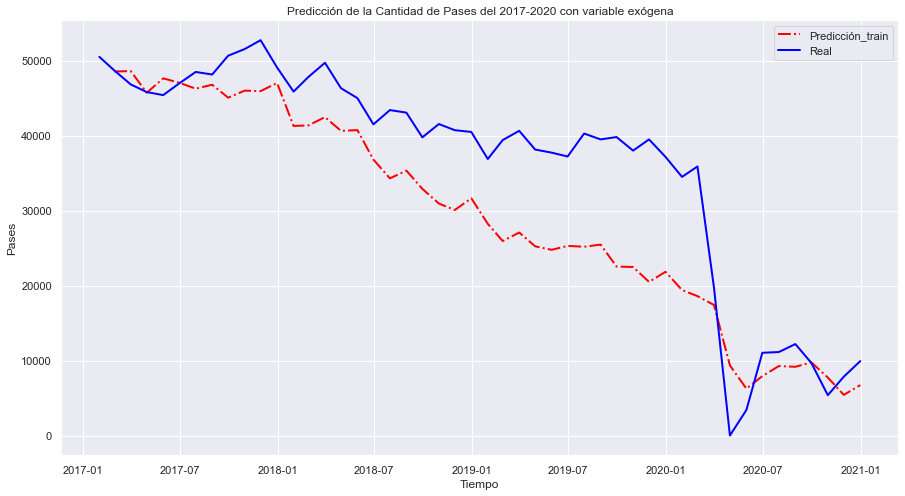

In [99]:
# Gráfico .
plt.figure(figsize=(15,8))
plt.plot(ventas_exog.cantidad_pasos_pred, label="Predicción_train", ls="-.", lw=2,color="red")
plt.plot(senial.cantidad_pasos, label="Real", ls="-", lw=2,color="blue")

plt.title("Predicción de la Cantidad de Pases del 2017-2020 con variable exógena")
plt.xlabel("Tiempo")
plt.ylabel("Pases")
plt.legend()
plt.show()

In [100]:
y_pred_exo_v = ventas_exog.cantidad_pasos_pred
y_real_exo_v = pred_rmse.cantidad_pasos
error_exo_v = np.sqrt(mean_squared_error(y_pred_exo_v, y_real_exo_v))
print('RMSE Cantidad Pases VARMAX: ', error_exo_v)

RMSE Cantidad Pases VARMAX:  9174.223890180117


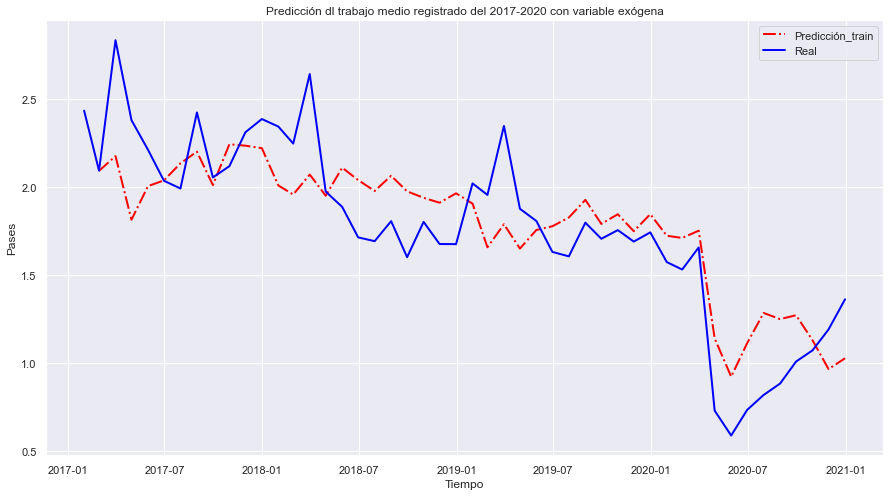

In [101]:
# Gráfico .
plt.figure(figsize=(15,8))
plt.plot(ventas_exog.Rotation_mean_pred, label="Predicción_train", ls="-.", lw=2,color="red")
plt.plot(senial.Rotation_mean, label="Real", ls="-", lw=2,color="blue")

plt.title("Predicción dl trabajo medio registrado del 2017-2020 con variable exógena")
plt.xlabel("Tiempo")
plt.ylabel("Pases")
plt.legend()
plt.show()

In [102]:
y_pred_exo_v = ventas_exog.Rotation_mean_pred
y_real_exo_v = pred_rmse.Rotation_mean
error_exog = np.sqrt(mean_squared_error(y_pred_exo_v, y_real_exo_v))
print('RMSE Cantidad Pases VARMAX: ', error_exog)

RMSE Cantidad Pases VARMAX:  0.28068713552847646


##### Producción Total

In [103]:
dataset.produccion_total

fecha
2017-01-31    26762
2017-02-28    25717
2017-03-31    39675
2017-04-30    37731
2017-05-31    45273
2017-06-30    45496
2017-07-31    38169
2017-08-31    45262
2017-09-30    46961
2017-10-31    43854
2017-11-30    45228
2017-12-31    33280
2018-01-31    21858
2018-02-28    39085
2018-03-31    49655
2018-04-30    45802
2018-05-31    46835
2018-06-30    39420
2018-07-31    41450
2018-08-31    49335
2018-09-30    37267
2018-10-31    38659
2018-11-30    36808
2018-12-31    20475
2019-01-31    14803
2019-02-28    32662
2019-03-31    29227
2019-04-30    30294
2019-05-31    30280
2019-06-30    23916
2019-07-31    21646
2019-08-31    30815
2019-09-30    27687
2019-10-31    31834
2019-11-30    27099
2019-12-31    14524
2020-01-31    20683
2020-02-29    26133
2020-03-31    19164
2020-04-30        0
2020-05-31     4802
2020-06-30    15657
2020-07-31    21316
2020-08-31    25835
2020-09-30    32149
2020-10-31    28706
2020-11-30    32570
2020-12-31    30172
Name: produccion_total, dtype: int

In [104]:
prod_dif = dataset.produccion_total.diff().dropna()
prod_dif.head()

fecha
2017-02-28    -1045.0
2017-03-31    13958.0
2017-04-30    -1944.0
2017-05-31     7542.0
2017-06-30      223.0
Name: produccion_total, dtype: float64

In [105]:
prod_dif

fecha
2017-02-28    -1045.0
2017-03-31    13958.0
2017-04-30    -1944.0
2017-05-31     7542.0
2017-06-30      223.0
2017-07-31    -7327.0
2017-08-31     7093.0
2017-09-30     1699.0
2017-10-31    -3107.0
2017-11-30     1374.0
2017-12-31   -11948.0
2018-01-31   -11422.0
2018-02-28    17227.0
2018-03-31    10570.0
2018-04-30    -3853.0
2018-05-31     1033.0
2018-06-30    -7415.0
2018-07-31     2030.0
2018-08-31     7885.0
2018-09-30   -12068.0
2018-10-31     1392.0
2018-11-30    -1851.0
2018-12-31   -16333.0
2019-01-31    -5672.0
2019-02-28    17859.0
2019-03-31    -3435.0
2019-04-30     1067.0
2019-05-31      -14.0
2019-06-30    -6364.0
2019-07-31    -2270.0
2019-08-31     9169.0
2019-09-30    -3128.0
2019-10-31     4147.0
2019-11-30    -4735.0
2019-12-31   -12575.0
2020-01-31     6159.0
2020-02-29     5450.0
2020-03-31    -6969.0
2020-04-30   -19164.0
2020-05-31     4802.0
2020-06-30    10855.0
2020-07-31     5659.0
2020-08-31     4519.0
2020-09-30     6314.0
2020-10-31    -3443.0
2020

In [131]:
warnings.filterwarnings("ignore")
for order in pq:
    try: 
        varmax =VARMAX(dif,exog=prod_dif,order = order)                                    
        res=varmax.fit()
        print("VARMAX: ", order)
        print("AIC: ", res.aic)
    except:
             continue

VARMAX:  (1, 1)
AIC:  3.893956070490667e+18
VARMAX:  (1, 2)
AIC:  930.5998439697794
VARMAX:  (1, 3)
AIC:  934.9977508433516
VARMAX:  (1, 4)
AIC:  939.7757449337288
VARMAX:  (1, 5)
AIC:  947.799489859389
VARMAX:  (1, 6)
AIC:  958.7699135672333
VARMAX:  (1, 7)
AIC:  1026.3284910358682
VARMAX:  (1, 8)
AIC:  968.5856284286925
VARMAX:  (1, 9)
AIC:  980.8430571037129
VARMAX:  (1, 10)
AIC:  981.5795334373519
VARMAX:  (1, 11)
AIC:  989.7074332691907
VARMAX:  (2, 1)
AIC:  931.1041151029532
VARMAX:  (2, 2)
AIC:  940.6666005606902
VARMAX:  (2, 3)
AIC:  946.7869117491722
VARMAX:  (2, 4)
AIC:  951.356923642412
VARMAX:  (2, 5)
AIC:  962.230578923528
VARMAX:  (2, 6)
AIC:  968.2531587458058
VARMAX:  (2, 7)
AIC:  80356.58993717979
VARMAX:  (2, 8)
AIC:  970.6589180572477
VARMAX:  (2, 9)
AIC:  1002.4972673054301
VARMAX:  (2, 10)
AIC:  1002.8913543701295
VARMAX:  (2, 11)
AIC:  1010.8913543701295
VARMAX:  (3, 1)
AIC:  937.2469671140957
VARMAX:  (3, 2)
AIC:  946.2542020114751
VARMAX:  (3, 3)
AIC:  954.87192

In [106]:
prod_exog = VARMAX(dif,exog=prod_dif, order=(1,2)).fit()
prod_exog.predict()
prod_exog.summary()

Dep. Variable:,"['cantidad_pasos', 'Rotation_mean']",No. Observations:,47
Model:,"VARMAX(1,2)",Log Likelihood,-446.300
,+ intercept,AIC,930.600
Date:,"Thu, 01 Jul 2021",BIC,965.753
Time:,07:02:45,HQIC,943.828
Sample:,02-28-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.05, 0.41",Jarque-Bera (JB):,"41.87, 0.34"
Prob(Q):,"0.83, 0.52",Prob(JB):,"0.00, 0.84"
Heteroskedasticity (H):,"2.82, 0.23",Skew:,"-1.49, 0.11"


In [107]:
produccion_exog= pd.DataFrame(prod_exog.predict(),index = dif.index,columns=["cantidad_pasos","Rotation_mean"])
produccion_exog["cantidad_pasos_pred"] = senial["cantidad_pasos"].iloc[-47]+ produccion_exog["cantidad_pasos"].cumsum()
produccion_exog["Rotation_mean_pred"] = senial["Rotation_mean"].iloc[-47]+ produccion_exog["Rotation_mean"].cumsum()
produccion_exog

,cantidad_pasos,Rotation_mean,cantidad_pasos_pred,Rotation_mean_pred
fecha,,,,
2017-02-28,2943.565028,0.153753,51626.172171,2.247753
2017-03-31,3882.778411,0.156348,55508.950582,2.404101
2017-04-30,-4946.033012,-0.359117,50562.917570,2.044984
2017-05-31,3591.678917,0.171833,54154.596487,2.216816
2017-06-30,-544.471297,0.052502,53610.125190,2.269318
2017-07-31,-1329.369071,0.036017,52280.756119,2.305335
2017-08-31,1368.996202,0.134846,53649.752321,2.440181
2017-09-30,-2416.125106,-0.146200,51233.627216,2.293981
2017-10-31,1150.272813,0.182111,52383.900029,2.476092


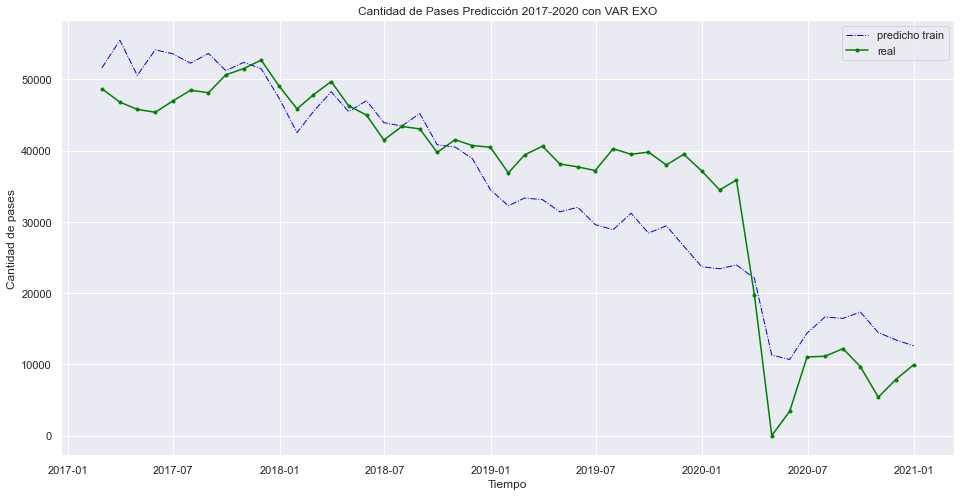

In [108]:
plt.figure(figsize=(16,8))
plt.plot(produccion_exog.cantidad_pasos_pred,label="predicho train",ls="-.",lw=1,color="blue")
plt.plot(pred_rmse.cantidad_pasos,label="real",marker=".",ls="solid",color="green")


plt.title("Cantidad de Pases Predicción 2017-2020 con VAR EXO")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pases")
plt.legend()
plt.show()

In [109]:
y_pred_exo_pases = produccion_exog.cantidad_pasos_pred
y_real_exo_pases = pred_rmse.cantidad_pasos
error_exo_pases = np.sqrt(mean_squared_error(y_pred_exo_pases, y_real_exo_pases))
print('RMSE Cantidad Pases VARMAX: ', error_exo_pases)

RMSE Cantidad Pases VARMAX:  6587.578217872803


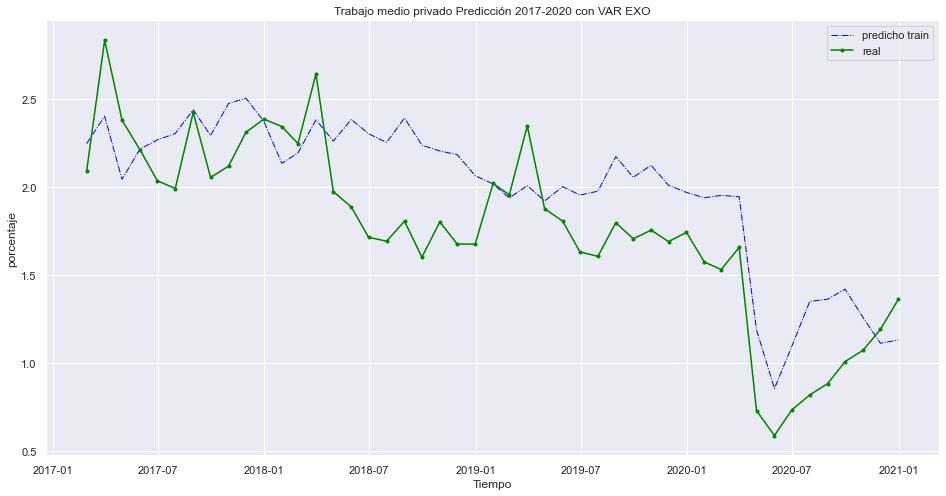

In [145]:
plt.figure(figsize=(16,8))
plt.plot(produccion_exog.Rotation_mean_pred,label="predicho train",ls="-.",lw=1,color="blue")
plt.plot(pred_rmse.Rotation_mean,label="real",marker=".",ls="solid",color="green")


plt.title("Trabajo medio privado Predicción 2017-2020 con VAR EXO")
plt.xlabel("Tiempo")
plt.ylabel("porcentaje")
plt.legend()
plt.show()

In [146]:
y_pred_exo_pases = produccion_exog.Rotation_mean_pred
y_real_exo_pases = pred_rmse.Rotation_mean
error_exog_pases = np.sqrt(mean_squared_error(y_pred_exo_pases, y_real_exo_pases))
print('RMSE Cantidad Pases VARMAX: ', error_exog_pases)

RMSE Cantidad Pases VARMAX:  0.3469622568906465


#### Conclusión:
Probamos como variable exógena la producción y la venta de vehículos, obteniendo como resultado que cada variable mejora la predicción de la cantidad de pases y del trabajo registrado medio. Lo que es interesante es que la ventas de vehículos mejora el comportamiento de la predicción con respecto a trabajo medio registrado, observando el grafico, podemos ver que a mediados del año 2019,el comportamiento de los datos originales con los valores predichos son casi iguales, incluso predice de una forma muy buena el efecto que se da por la pandemia en marzo del 2020 y su posterior recuperación.  Por otro lado, la producción de vehículos aporta mas información al modelo, mejorando la predicción del flujo vehicular. Notamos como a partir de tercer cuatrimestre del año 2017, hasta principios del año 2019, los valores predichos son prácticamente iguales a los valores originales. Todo el 2020 lo predice con valores menores a los originales, pero predice los comportamientos que tiene la serie original de una manera buena. Al llegar al mes de marzo, predice la caida sufrida por motivos de la cuarentena, predice su recuperación posterior y también su posterior comportamiento.


---

#### Conclusión Final:
El objetivo del proyecto fue predecir el flujo vehicular a travéz de la influencia de otras variables. Nos dimos cuenta que el empleo privado constituye un factor fundamental para el caudal de vehículos que sufre ese peaje. Respondiendo a la pregunta planteada al comienzo "¿Acaso la actividad laboral puede afectar el flujo vehicular?". Esto se puede deber a que un mayor nivel de empleo, aumentará el flujo vehicular por ese peaje, puede deberse a que aumente el transporte de personal como de personas que se movilizan de manera individual en sus vehiculos a sus puntos de trabajo. Por otro lado, hubo variables que fueron mas importantes que otras, la venta de vehiculos afecta directamente al empleo privado y la producción afecta de manera directa a nuestra variable objetivo. Desde el análisis exploratorio de datos, en cuanto a la producción y ventas de vehiculos, notamos que la tendencia del tráfico era igual mas allá de la volatiidad de la producción y que luego, al realizar las pruebas para llevar a cabo el moedelo (Causalidad/Cointegración) confirmamos que podía ser influyente la producción de vehiculos y el trabajo registrado, no la venta de los mismo. Finalmente el balance del proyecto fue positivo, ya que si bien no pudimos predecir la variable objetivo del proyecto, pudimos descubrir que existen otras variables mas importantes que influyen de manera directa e indirecta en el tráfico como fue el empelo privado yla produccion de vehiculos. De esta manera, terminamos de darnos cuenta de que el flujo vehicular era una consecuencia y no una causalidad en si misma.

#### Conclusión del modelo:
Afirmamos que le modelo VARMAX fue el apropiado para trabajar este tipo de problemas multivariables, permitiéndonos sacar el máximo rendimiento. Además de lo mencionado, pudimos corroborar la versastilidad del modelo, pudiendo ajustarse a problemáticas de otro tipo. Al trabajar con éste moedelo, es importante tener en cuenta que las variables deben tener las mismas magnitudes para poder sacarle un buen provecho al modelo. Al utilizar porcentajes logramos suavizar el comportamiento de las predicciones con numero enteros, mejorando la funcionalidad del modelo. Por otra parte es la primera vez que trabajo con este tipos de modelos, me encontré con muy poca documentación en español y siendo sincero es la primera vez que trabajo con problemas multivariables. Pienso que éste trabajo puede ser un buen punto de partida para seguir profundizando sobre éste tipo de problemas que me resulto muy interesante.